# Report Assignment Notebook: Big Data and Data Mining

## Context.
This assignment is based on real world data: specifically, road traffic accidents in 2020. This assignment is a chance to test your skills against such real-world data in order to produce meaningful outputs.

## Project Background Information.
All road traffic accidents involving casualties are logged and reported in Great Britain, along with (probably) a majority of other non-fatal road traffic accidents. Every year, the government releases a large batch of data associated with these reports. In this assignment we will be using the data from 2020.

### Questions
Imagine that you are a data scientist confronted with this data (this is not far from the truth!). Your task is to advise government agencies about how to improve road safety and create a model that would predict such accidents and the injuries that they incur. Importantly, we have used and will be using time within our workshops to help with this assignment, and it doesn’t have to be all completed at once.
The questions (at minimum) that the assignment should address are as follows:
1. Are there significant hours of the day, and days of the week, on which accidents occur?
2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We
suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over
500cc.
3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they
are more likely to be involved?
4. Using the apriori algorithm, explore the impact of selected variables on accident severity.
5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can
do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data.
What do these clusters reveal about the distribution of accidents in our region?
6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your
data?
7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in
road traffic accidents, with the aim of informing and improving road safety measures?


# BIG DATA PROJECT

In [5]:
# importing necessary library
import pandas as pd
import sqlite3
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_colwidth', None)
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


In [6]:
# establishing connection with the sql database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")
cur=con.cursor()

In [7]:
# establishing connection with the sql database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")
cur=con.cursor()

# QUESTION 1

__Are there significant hours of the day, and days of the week, on which accidents occur?__


In [8]:
# retrieving rows where accident year is from 2020  and storing result in pandas dataframe
acc_data2020=pd.read_sql(f'SELECT accident_index,accident_year,date,day_of_week,time  FROM accident WHERE accident_year = 2020 ',con)
acc_data2020

,accident_index,accident_year,date,day_of_week,time
0,2020010219808,2020,04/02/2020,3,09:00
1,2020010220496,2020,27/04/2020,2,13:55
2,2020010228005,2020,01/01/2020,4,01:25
3,2020010228006,2020,01/01/2020,4,01:50
4,2020010228011,2020,01/01/2020,4,02:25
...,...,...,...,...,...
91194,2020991027064,2020,12/08/2020,4,14:30
91195,2020991029573,2020,13/11/2020,6,15:05
91196,2020991030297,2020,15/04/2020,4,12:42
91197,2020991030900,2020,15/12/2020,3,14:00


In [9]:
# checking for NaN
acc_data2020.isna().sum()

accident_index    0
accident_year     0
date              0
day_of_week       0
time              0
dtype: int64

In [10]:
# adding a new column to add clarity to the days of the week
days_mapping = {1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'}
acc_data2020['day name'] = acc_data2020['day_of_week'].map(days_mapping)

In [11]:
day_counts = acc_data2020['day name'].value_counts().reset_index()
day_counts.columns = ['day name', 'count']

# Sort the day names in the correct order (e.g., Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['day name'] = pd.Categorical(day_counts['day name'], categories=day_order, ordered=True)

# Using Plotly, create an interactive histogram plot.
fig = px.bar(day_counts, x='day name', y='count', labels={'count': 'Accident Count'}, color='count', height=500,color_continuous_scale='reds')

# Specify the figure layout and axis labels.

fig.update_layout(title='Accident Count by Day of the Week',
                  xaxis_title='Day of the Week',
                  yaxis_title='Accident Count',
                  showlegend=False)

# Display the interactive plot
fig.show()
    

In [12]:
# convert the 'time' column to a datetime format
acc_data2020['converted_time'] = pd.DatetimeIndex(acc_data2020['time'])
acc_data2020['converted_time']

0       2024-03-04 09:00:00
1       2024-03-04 13:55:00
2       2024-03-04 01:25:00
3       2024-03-04 01:50:00
4       2024-03-04 02:25:00
                ...        
91194   2024-03-04 14:30:00
91195   2024-03-04 15:05:00
91196   2024-03-04 12:42:00
91197   2024-03-04 14:00:00
91198   2024-03-04 13:50:00
Name: converted_time, Length: 91199, dtype: datetime64[ns]

In [13]:
# Extracting the hour component from the 'converted_time' column

hours = pd.DatetimeIndex(acc_data2020['converted_time']).hour
hours

Index([ 9, 13,  1,  1,  2,  1,  3,  3,  4,  3,
       ...
       10, 17,  7, 13, 12, 14, 15, 12, 14, 13],
      dtype='int32', name='converted_time', length=91199)

In [14]:
# Extracting the minutes component from the 'converted_time' column
mins = pd.DatetimeIndex(acc_data2020['converted_time']).minute
mins

Index([ 0, 55, 25, 50, 25, 30, 43,  0,  0, 25,
       ...
       30,  0, 10, 27,  0, 30,  5, 42,  0, 50],
      dtype='int32', name='converted_time', length=91199)

In [15]:
# Calculate the decimal time and create a new column
acc_data2020['decimal_time']= hours + mins/60
acc_data2020['decimal_time']

0         9.000000
1        13.916667
2         1.416667
3         1.833333
4         2.416667
           ...    
91194    14.500000
91195    15.083333
91196    12.700000
91197    14.000000
91198    13.833333
Name: decimal_time, Length: 91199, dtype: float64

In [16]:
# counting distince value
acc_data2020['decimal_time'].value_counts()

decimal_time
17.000000    862
16.000000    785
15.000000    774
17.500000    746
18.000000    739
            ... 
3.600000       1
4.966667       1
4.650000       1
4.550000       1
4.516667       1
Name: count, Length: 1438, dtype: int64

In [17]:
# Extracting the hour component from the 'converted_time' column  and adding it to my dataframe 
acc_data2020['hours'] = pd.DatetimeIndex(acc_data2020['converted_time']).hour
acc_data2020

,accident_index,accident_year,date,day_of_week,time,day name,converted_time,decimal_time,hours
0,2020010219808,2020,04/02/2020,3,09:00,Tuesday,2024-03-04 09:00:00,9.000000,9
1,2020010220496,2020,27/04/2020,2,13:55,Monday,2024-03-04 13:55:00,13.916667,13
2,2020010228005,2020,01/01/2020,4,01:25,Wednesday,2024-03-04 01:25:00,1.416667,1
3,2020010228006,2020,01/01/2020,4,01:50,Wednesday,2024-03-04 01:50:00,1.833333,1
4,2020010228011,2020,01/01/2020,4,02:25,Wednesday,2024-03-04 02:25:00,2.416667,2
...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,12/08/2020,4,14:30,Wednesday,2024-03-04 14:30:00,14.500000,14
91195,2020991029573,2020,13/11/2020,6,15:05,Friday,2024-03-04 15:05:00,15.083333,15
91196,2020991030297,2020,15/04/2020,4,12:42,Wednesday,2024-03-04 12:42:00,12.700000,12
91197,2020991030900,2020,15/12/2020,3,14:00,Tuesday,2024-03-04 14:00:00,14.000000,14


In [18]:
# checking the unique hours
acc_data2020['hours'].unique()

array([ 9, 13,  1,  2,  3,  4,  5, 10,  8, 14, 16, 15, 19, 18, 17, 20, 23,
        6, 22, 11, 12, 21,  7,  0])

In [19]:
acc_data2020

,accident_index,accident_year,date,day_of_week,time,day name,converted_time,decimal_time,hours
0,2020010219808,2020,04/02/2020,3,09:00,Tuesday,2024-03-04 09:00:00,9.000000,9
1,2020010220496,2020,27/04/2020,2,13:55,Monday,2024-03-04 13:55:00,13.916667,13
2,2020010228005,2020,01/01/2020,4,01:25,Wednesday,2024-03-04 01:25:00,1.416667,1
3,2020010228006,2020,01/01/2020,4,01:50,Wednesday,2024-03-04 01:50:00,1.833333,1
4,2020010228011,2020,01/01/2020,4,02:25,Wednesday,2024-03-04 02:25:00,2.416667,2
...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,12/08/2020,4,14:30,Wednesday,2024-03-04 14:30:00,14.500000,14
91195,2020991029573,2020,13/11/2020,6,15:05,Friday,2024-03-04 15:05:00,15.083333,15
91196,2020991030297,2020,15/04/2020,4,12:42,Wednesday,2024-03-04 12:42:00,12.700000,12
91197,2020991030900,2020,15/12/2020,3,14:00,Tuesday,2024-03-04 14:00:00,14.000000,14


In [20]:
# Calculate the counts of accidents for each hour
hour_counts = acc_data2020['hours'].value_counts().reset_index()
hour_counts.columns = ['hour', 'count']

# Create the interactive histogram plot using Plotly with the 'Reds' color scale
fig = px.bar(hour_counts, x='hour', y='count', labels={'hour': 'Hour of the Day', 'count': 'Accident Count'},
             height=500, color='count', color_continuous_scale='Reds')

# specify the figure axis labels and the figure layout
fig.update_layout(title='Accident Count by Hour of the Day',
                  xaxis_title='Hour of the Day',
                  yaxis_title='Accident Count',
                  showlegend=False,
                  xaxis=dict(tickmode='linear', dtick=1))  # Show all numbers from 0 to 23 on the x-axis

# Show the interactive plot
fig.show()


# question 2

__For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.__

In [21]:
# Reading data from the database using the SQL query and storing it in pandas dataframe
vehicle_acc2020 = pd.read_sql("SELECT vehicle.accident_index,day_of_week,time,vehicle_type FROM  vehicle  join accident on vehicle.accident_index=accident.accident_index WHERE accident.accident_year= 2020 and vehicle_type in (02,03,04,05) ",con)
vehicle_acc2020

,accident_index,day_of_week,time,vehicle_type
0,2020010228020,4,03:25,3
1,2020010228077,4,08:00,2
2,2020010228086,4,14:00,3
3,2020010228097,4,14:37,3
4,2020010228148,4,19:05,3
...,...,...,...,...
14121,2020991010130,5,16:30,3
14122,2020991011809,4,17:30,3
14123,2020991012311,2,17:55,3
14124,2020991012353,5,15:45,4


In [22]:
# counting the frequency of each vehicle type 
vehicle_acc2020['vehicle_type'].value_counts()

vehicle_type
3    7523
5    3784
4    1691
2    1128
Name: count, dtype: int64

In [23]:
# Creating  this dictionary to replace numeric values in my dataframe
mc_maping= {2:'MC125cc_under',3:'MC125cc_under',4:'MCover125cc_500cc',5:'MCover500cc'}

In [24]:
#  create a new column in the vehicle_acc2020 DataFrame that contains readable descriptions of motorcycle types based on the mapping defined in the mc_mapping dictionary
vehicle_acc2020['motorcycle_type'] = vehicle_acc2020['vehicle_type'].map(mc_maping)

In [25]:
vehicle_acc2020

,accident_index,day_of_week,time,vehicle_type,motorcycle_type
0,2020010228020,4,03:25,3,MC125cc_under
1,2020010228077,4,08:00,2,MC125cc_under
2,2020010228086,4,14:00,3,MC125cc_under
3,2020010228097,4,14:37,3,MC125cc_under
4,2020010228148,4,19:05,3,MC125cc_under
...,...,...,...,...,...
14121,2020991010130,5,16:30,3,MC125cc_under
14122,2020991011809,4,17:30,3,MC125cc_under
14123,2020991012311,2,17:55,3,MC125cc_under
14124,2020991012353,5,15:45,4,MCover125cc_500cc


In [26]:
#  convert the 'time' column to a datetime format
vehicle_acc2020['converted_time'] = pd.DatetimeIndex(vehicle_acc2020['time'])
vehicle_acc2020['converted_time']

0       2024-03-04 03:25:00
1       2024-03-04 08:00:00
2       2024-03-04 14:00:00
3       2024-03-04 14:37:00
4       2024-03-04 19:05:00
                ...        
14121   2024-03-04 16:30:00
14122   2024-03-04 17:30:00
14123   2024-03-04 17:55:00
14124   2024-03-04 15:45:00
14125   2024-03-04 12:42:00
Name: converted_time, Length: 14126, dtype: datetime64[ns]

In [27]:
# Extracting the hour component from the 'converted_time' column and adding it to my dataframe 

vehicle_acc2020['hours'] = pd.DatetimeIndex(vehicle_acc2020['converted_time']).hour
vehicle_acc2020

,accident_index,day_of_week,time,vehicle_type,motorcycle_type,converted_time,hours
0,2020010228020,4,03:25,3,MC125cc_under,2024-03-04 03:25:00,3
1,2020010228077,4,08:00,2,MC125cc_under,2024-03-04 08:00:00,8
2,2020010228086,4,14:00,3,MC125cc_under,2024-03-04 14:00:00,14
3,2020010228097,4,14:37,3,MC125cc_under,2024-03-04 14:37:00,14
4,2020010228148,4,19:05,3,MC125cc_under,2024-03-04 19:05:00,19
...,...,...,...,...,...,...,...
14121,2020991010130,5,16:30,3,MC125cc_under,2024-03-04 16:30:00,16
14122,2020991011809,4,17:30,3,MC125cc_under,2024-03-04 17:30:00,17
14123,2020991012311,2,17:55,3,MC125cc_under,2024-03-04 17:55:00,17
14124,2020991012353,5,15:45,4,MCover125cc_500cc,2024-03-04 15:45:00,15


In [28]:
# adding a new column to add clarity to the days of the week
days_mapping = {1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'}
vehicle_acc2020['day name'] = vehicle_acc2020['day_of_week'].map(days_mapping)

In [29]:
vehicle_acc2020

,accident_index,day_of_week,time,vehicle_type,motorcycle_type,converted_time,hours,day name
0,2020010228020,4,03:25,3,MC125cc_under,2024-03-04 03:25:00,3,Wednesday
1,2020010228077,4,08:00,2,MC125cc_under,2024-03-04 08:00:00,8,Wednesday
2,2020010228086,4,14:00,3,MC125cc_under,2024-03-04 14:00:00,14,Wednesday
3,2020010228097,4,14:37,3,MC125cc_under,2024-03-04 14:37:00,14,Wednesday
4,2020010228148,4,19:05,3,MC125cc_under,2024-03-04 19:05:00,19,Wednesday
...,...,...,...,...,...,...,...,...
14121,2020991010130,5,16:30,3,MC125cc_under,2024-03-04 16:30:00,16,Thursday
14122,2020991011809,4,17:30,3,MC125cc_under,2024-03-04 17:30:00,17,Wednesday
14123,2020991012311,2,17:55,3,MC125cc_under,2024-03-04 17:55:00,17,Monday
14124,2020991012353,5,15:45,4,MCover125cc_500cc,2024-03-04 15:45:00,15,Thursday


In [30]:


# Determine the number of accidents for each day_name and motorcycle type.

day_motorcycle_counts = vehicle_acc2020.groupby(['day name', 'motorcycle_type']).size().reset_index(name='count')

# Sort the day names in descending order of counts
day_order = day_motorcycle_counts.groupby('day name')['count'].sum().sort_values(ascending=False).index
day_motorcycle_counts['day name'] = pd.Categorical(day_motorcycle_counts['day name'], categories=day_order, ordered=True)

# Using plotly , creating an interactive plot
fig = px.bar(day_motorcycle_counts, x='day name', y='count', labels={'count': 'Motor Cycle Accident Count'},
             color='motorcycle_type', height=500, color_discrete_sequence=['yellow', 'gold', 'orange' , 'red'])

# specify the figure layout and axis labels
fig.update_layout(title='Motorcycle Accident Count by Day of the Week and Motorcycle Type',
                  xaxis_title='Day of the Week',
                  yaxis_title='Motorcycle Accident Count',
                  showlegend=True)  # Set showlegend to True to display the motorcycle_type legend

# displayy the interactive plot
fig.show()


In [31]:
# Calculate the counts of accidents for each hour and motorcycle type
hour_motorcycle_counts = vehicle_acc2020.groupby(['hours', 'motorcycle_type']).size().reset_index(name='count')

# Sort the hours in ascending order
hour_order = hour_motorcycle_counts.groupby('hours')['count'].sum().sort_values().index
hour_motorcycle_counts['hours'] = pd.Categorical(hour_motorcycle_counts['hours'], categories=hour_order, ordered=True)

# Create the interactive histogram plot using Plotly
fig = px.bar(hour_motorcycle_counts, x='hours', y='count', labels={'count': 'Motor Cycle Accident Count'},
             color='motorcycle_type', height=500, color_discrete_sequence=['yellow', 'gold', 'orange', 'red'])

# Set the figure layout and axis labels
fig.update_layout(title='Motorcycle Accident Count by Hour of the Day and Motorcycle Type',
                  xaxis_title='Hour of the Day',
                  yaxis_title='Motorcycle Accident Count',
                  showlegend=True,  # Set showlegend to True to display the motorcycle_type legend
                  xaxis=dict(tickmode='linear', dtick=1))  # Display whole numbers on x-axis

# display the interactive plot
fig.show()


# Question 3

__For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?__

In [32]:
# Reading data from the database using the SQL query and storing it in pandas dataframe
cas_acc2020 = pd.read_sql("SELECT accident.accident_index,date,day_of_week, time FROM casualty JOIN accident ON casualty.accident_index=accident.accident_index WHERE accident.accident_year >= 2020 AND casualty_class =3",con)
cas_acc2020

,accident_index,date,day_of_week,time
0,2020010219808,04/02/2020,3,09:00
1,2020010220496,27/04/2020,2,13:55
2,2020010220496,27/04/2020,2,13:55
3,2020010228005,01/01/2020,4,01:25
4,2020010228006,01/01/2020,4,01:50
...,...,...,...,...
14745,2020991023621,10/11/2020,3,10:30
14746,2020991023880,14/12/2020,2,17:00
14747,2020991024526,17/11/2020,3,12:00
14748,2020991029573,13/11/2020,6,15:05


In [33]:
#  convert the 'time' column to a datetime format
cas_acc2020['converted_time'] = pd.DatetimeIndex(cas_acc2020['time'])
cas_acc2020['converted_time']

0       2024-03-04 09:00:00
1       2024-03-04 13:55:00
2       2024-03-04 13:55:00
3       2024-03-04 01:25:00
4       2024-03-04 01:50:00
                ...        
14745   2024-03-04 10:30:00
14746   2024-03-04 17:00:00
14747   2024-03-04 12:00:00
14748   2024-03-04 15:05:00
14749   2024-03-04 13:50:00
Name: converted_time, Length: 14750, dtype: datetime64[ns]

In [34]:
# Extracting the hour component from the 'converted_time' column and adding it to my dataframe 
cas_acc2020['hours'] = pd.DatetimeIndex(cas_acc2020['converted_time']).hour
cas_acc2020

,accident_index,date,day_of_week,time,converted_time,hours
0,2020010219808,04/02/2020,3,09:00,2024-03-04 09:00:00,9
1,2020010220496,27/04/2020,2,13:55,2024-03-04 13:55:00,13
2,2020010220496,27/04/2020,2,13:55,2024-03-04 13:55:00,13
3,2020010228005,01/01/2020,4,01:25,2024-03-04 01:25:00,1
4,2020010228006,01/01/2020,4,01:50,2024-03-04 01:50:00,1
...,...,...,...,...,...,...
14745,2020991023621,10/11/2020,3,10:30,2024-03-04 10:30:00,10
14746,2020991023880,14/12/2020,2,17:00,2024-03-04 17:00:00,17
14747,2020991024526,17/11/2020,3,12:00,2024-03-04 12:00:00,12
14748,2020991029573,13/11/2020,6,15:05,2024-03-04 15:05:00,15


In [35]:
# adding a new column to add clarity to the days of the week
days_mapping = {1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'}
cas_acc2020['day name'] = cas_acc2020['day_of_week'].map(days_mapping)

In [36]:
cas_acc2020

,accident_index,date,day_of_week,time,converted_time,hours,day name
0,2020010219808,04/02/2020,3,09:00,2024-03-04 09:00:00,9,Tuesday
1,2020010220496,27/04/2020,2,13:55,2024-03-04 13:55:00,13,Monday
2,2020010220496,27/04/2020,2,13:55,2024-03-04 13:55:00,13,Monday
3,2020010228005,01/01/2020,4,01:25,2024-03-04 01:25:00,1,Wednesday
4,2020010228006,01/01/2020,4,01:50,2024-03-04 01:50:00,1,Wednesday
...,...,...,...,...,...,...,...
14745,2020991023621,10/11/2020,3,10:30,2024-03-04 10:30:00,10,Tuesday
14746,2020991023880,14/12/2020,2,17:00,2024-03-04 17:00:00,17,Monday
14747,2020991024526,17/11/2020,3,12:00,2024-03-04 12:00:00,12,Tuesday
14748,2020991029573,13/11/2020,6,15:05,2024-03-04 15:05:00,15,Friday


In [37]:
# Calculate the counts of accidents for each day name
day_counts = cas_acc2020['day name'].value_counts().reset_index()
day_counts.columns = ['day name', 'count']

# Sort the day names in the correct order (e.g., Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['day name'] = pd.Categorical(day_counts['day name'], categories=day_order, ordered=True)

# Create the interactive histogram plot with Plotly
fig = px.bar(day_counts, x='day name', y='count', labels={'count': 'Accident Count'}, color='count', height=500,
             color_continuous_scale='reds')

# specify the  axis labels figure layout and
fig.update_layout(title='Pedestrian accident Count by Day of the Week',
                  xaxis_title='Day of the Week',
                  yaxis_title='Pedestrian accident Count',
                  showlegend=False)

# display the interactive plot
fig.show()

In [38]:

# Calculate the counts of accidents for each hour
hour_counts = cas_acc2020['hours'].value_counts().reset_index()
hour_counts.columns = ['hour', 'count']

# Using Plotly Express, create an interactive histogram plot.
fig = px.bar(hour_counts, x='hour', y='count', labels={'hour': 'Hour of the Day', 'count': 'Accident Count'},
             height=500, color='count', color_continuous_scale='Reds')

# specifying the figure layout and axis labels
fig.update_layout(title='Accident Count by Hour of the Day',
                  xaxis_title='Hour of the Day',
                  yaxis_title='Accident Count',
                  showlegend=False,
                  xaxis=dict(tickmode='linear', dtick=1))  # Show all numbers from 0 to 23 on the x-axis

# display the interactive plot
fig.show()


# 

# Question 4

__Using the apriori algorithm, explore the impact of selected variables on accident severity.__

In [39]:
# installing mlxtend
# pip install mlxtend

In [40]:
# importing the neccessary libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [41]:
# Reading data from the database using the SQL query and storing it in pandas dataframe(joining accident and vehicle table)
AccVehCas_data2020=pd.read_sql('SELECT road_type, speed_limit,road_surface_conditions,weather_conditions,sex_of_driver,accident_severity FROM accident JOIN vehicle ON accident.accident_index =vehicle.accident_index  WHERE accident.accident_year >= 2020' ,con)
AccVehCas_data2020

,road_type,speed_limit,road_surface_conditions,weather_conditions,sex_of_driver,accident_severity
0,6,20,9,9,2,3
1,6,20,1,1,1,3
2,6,30,2,1,3,3
3,6,30,1,1,1,2
4,6,30,1,1,1,3
...,...,...,...,...,...,...
167370,6,60,1,1,1,2
167371,6,60,1,1,1,2
167372,6,30,1,1,2,3
167373,6,30,1,1,1,3


In [42]:
# checking for NaN Value
AccVehCas_data2020.isna().sum()

road_type                  0
speed_limit                0
road_surface_conditions    0
weather_conditions         0
sex_of_driver              0
accident_severity          0
dtype: int64

In [43]:
# retrieving column names that have -1 Values 
for i in AccVehCas_data2020.columns:
    if -1 in AccVehCas_data2020[i].values:
        print(i)


speed_limit
road_surface_conditions
weather_conditions
sex_of_driver


In [44]:
# checking speed_limit unique value
AccVehCas_data2020['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [45]:
AccVehCas_data2020[AccVehCas_data2020['speed_limit']==-1]
# this output shows that most of the speed_limit with -1 has road_surface_condition of 1(Dry) and weather condition of 1(Fine without high winds)
# hence we can group our data based on road_surface_conditions and get the median of the speed_limit within this group and and use them to fill the corresponding -1 rows in the dataset 

,road_type,speed_limit,road_surface_conditions,weather_conditions,sex_of_driver,accident_severity
3512,3,-1,1,1,2,3
9655,6,-1,1,1,1,3
30656,3,-1,1,2,2,2
33443,9,-1,2,2,1,3
33853,9,-1,9,9,1,3
34267,9,-1,1,7,1,3
34268,9,-1,1,7,3,3
37889,2,-1,1,1,3,2
57263,6,-1,1,2,2,2
86634,2,-1,2,1,1,3


In [46]:
AccVehCas_data2020[AccVehCas_data2020['road_surface_conditions']==5]['speed_limit'].unique()

array([30, 50, 70, 20, 40, 60], dtype=int64)

In [47]:

# Calculating the median of each group
road_surface_conditions = AccVehCas_data2020.groupby('road_surface_conditions').median()

# creating a function to fill -1 spedd limit values  in AccVehCas_data2020 with median speed_limit associated with the road surface condition of that row
def fill_with_median(row):
    if row['speed_limit'] == -1:
        row['speed_limit'] = road_surface_conditions.loc[row['road_surface_conditions']]['speed_limit']
    return row

# Apply the function to fill -1 values with group median for each row
AccVehCas_data2020 = AccVehCas_data2020.apply(lambda row: fill_with_median(row), axis=1)


In [48]:
# retrieving column names that have -1 Values 
for i in AccVehCas_data2020.columns:
    if -1 in AccVehCas_data2020[i].values:
        print(i)
   


road_surface_conditions
weather_conditions
sex_of_driver


In [49]:
# retrieving rows where road_surface_conditions==-1
AccVehCas_data2020[AccVehCas_data2020['road_surface_conditions']==-1]

,road_type,speed_limit,road_surface_conditions,weather_conditions,sex_of_driver,accident_severity
38832,6,30,-1,9,1,3
38833,6,30,-1,9,1,3
38842,6,30,-1,9,2,3
38847,6,60,-1,9,2,3
38848,6,60,-1,9,2,3
...,...,...,...,...,...,...
160257,6,30,-1,9,2,3
160258,6,30,-1,9,2,3
167196,6,30,-1,8,1,3
167197,6,30,-1,8,2,3


In [50]:
AccVehCas_data2020[AccVehCas_data2020['road_surface_conditions']==-1]['weather_conditions'].value_counts()

weather_conditions
 9    293
 1    186
 8     40
 2     25
 5      3
 3      2
 4      1
 7      1
-1      1
Name: count, dtype: int64

In [51]:
AccVehCas_data2020[AccVehCas_data2020['weather_conditions']==8]['road_surface_conditions'].value_counts()

road_surface_conditions
 1    2424
 2    2006
 4     267
 9      54
-1      40
 3       6
 5       1
Name: count, dtype: int64

In [52]:
# Define a function to perform the replacements and deletions
# this function checks the weather condition and based on the weather condition it will replace -1 with the appropriate road surface condition
# for weather condition that cannot be determined the rows will be dropped 
def replace_and_delete(row):
    if row['weather_conditions'] == 1:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 1
    elif row['weather_conditions'] == 8:
        if row['road_surface_conditions'] == -1:
            return None  # Delete the row by returning None
    elif row['weather_conditions'] == -1:
        if row['road_surface_conditions'] == -1:
            return None
    elif row['weather_conditions'] == 2:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 2
    elif row['weather_conditions'] == 5:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 5
    elif row['weather_conditions'] == 3:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 3
    elif row['weather_conditions'] == 4:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 1
    elif row['weather_conditions'] == 7:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 4
    elif row['weather_conditions'] == 9:
        if row['road_surface_conditions'] == -1:
            return None  # Delete the row by returning None
    return row

# Apply the function to the DataFrame to perform the replacements and dropped
AccVehCas_data2020 = AccVehCas_data2020.apply(replace_and_delete, axis=1)

# Drop rows with None (rows marked for deletion)
AccVehCas_data2020 = AccVehCas_data2020.dropna()

In [53]:
# retrieving column names that have -1 Values 
for i in AccVehCas_data2020.columns:
    if -1 in AccVehCas_data2020[i].values:
        print(i)

sex_of_driver


In [54]:
# value_counts of sex_of_drivers
AccVehCas_data2020['sex_of_driver'].value_counts()

sex_of_driver
 1.0    106047
 2.0     41734
 3.0     19247
-1.0        13
Name: count, dtype: int64

In [55]:
# retrieving sex_of_driver rows that have -1 Values 
AccVehCas_data2020[AccVehCas_data2020['sex_of_driver']==-1]

,road_type,speed_limit,road_surface_conditions,weather_conditions,sex_of_driver,accident_severity
28,7.0,20.0,1.0,1.0,-1.0,3.0
445,6.0,30.0,1.0,8.0,-1.0,3.0
587,7.0,30.0,1.0,1.0,-1.0,3.0
1098,1.0,30.0,1.0,1.0,-1.0,3.0
1830,7.0,30.0,9.0,9.0,-1.0,3.0
2263,1.0,30.0,1.0,1.0,-1.0,3.0
3825,9.0,30.0,2.0,1.0,-1.0,3.0
5020,1.0,30.0,1.0,1.0,-1.0,3.0
5061,3.0,30.0,1.0,9.0,-1.0,3.0
5145,6.0,30.0,1.0,1.0,-1.0,3.0


In [56]:
# no possible way to infer the sex of a gender with this data hence these 13 rows will be dropped
AccVehCas_data2020 = AccVehCas_data2020[AccVehCas_data2020['sex_of_driver'] != -1]

In [57]:
# retrieving column names that have -1 Values 
for i in AccVehCas_data2020.columns:
    if -1 in AccVehCas_data2020[i].values:
        print(i)


In [58]:
# performing one-hot encoding on acc_severity column
acc_severity=pd.get_dummies(AccVehCas_data2020['accident_severity'], prefix='severity')

In [59]:
acc_severity

,severity_1.0,severity_2.0,severity_3.0
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,False
4,False,False,True
...,...,...,...
167370,False,True,False
167371,False,True,False
167372,False,False,True
167373,False,False,True


In [60]:
# performing one-hot encoding on road_type,speed_limit,road_surface_conditions,weather_conditions,sex_of_driver columns
road_type=pd.get_dummies(AccVehCas_data2020['road_type'], prefix='road_type')
speed_limit=pd.get_dummies(AccVehCas_data2020['speed_limit'], prefix='speed_limit')
road_surface_conditions=pd.get_dummies(AccVehCas_data2020['road_surface_conditions'], prefix='road_surface_conditions')
weather_conditions=pd.get_dummies(AccVehCas_data2020['weather_conditions'], prefix='weather_conditions')
sex_of_driver=pd.get_dummies(AccVehCas_data2020['sex_of_driver'], prefix='sex_of_driver')

In [61]:
# concatinating all one-hot encoding columns
encoded_AccVehCas_data2020=pd.concat([acc_severity,road_type,speed_limit,road_surface_conditions,weather_conditions,sex_of_driver], axis=1)

In [62]:
encoded_AccVehCas_data2020

,severity_1.0,severity_2.0,severity_3.0,road_type_1.0,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,road_type_9.0,speed_limit_20.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,road_surface_conditions_1.0,road_surface_conditions_2.0,road_surface_conditions_3.0,road_surface_conditions_4.0,road_surface_conditions_5.0,road_surface_conditions_9.0,weather_conditions_1.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,weather_conditions_9.0,sex_of_driver_1.0,sex_of_driver_2.0,sex_of_driver_3.0
0,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
1,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
167371,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
167372,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
167373,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [63]:
# implementing apriori algorithm to find how items often happen together 
# using a minimum support of 0.50
df_apriori=apriori(encoded_AccVehCas_data2020,min_support=0.20,use_colnames=True)
df_apriori

,support,itemsets
0,0.795477,(severity_3.0)
1,0.724603,(road_type_6.0)
2,0.569821,(speed_limit_30.0)
3,0.698122,(road_surface_conditions_1.0)
4,0.282611,(road_surface_conditions_2.0)
...,...,...
58,0.228794,"(road_type_6.0, speed_limit_30.0, sex_of_driver_1.0, weather_conditions_1.0)"
59,0.306865,"(road_type_6.0, road_surface_conditions_1.0, sex_of_driver_1.0, weather_conditions_1.0)"
60,0.240391,"(road_surface_conditions_1.0, speed_limit_30.0, sex_of_driver_1.0, weather_conditions_1.0)"
61,0.250485,"(road_type_6.0, road_surface_conditions_1.0, weather_conditions_1.0, speed_limit_30.0, severity_3.0)"


In [64]:
# getting the number of items in the itemsets
df_apriori['frequency']=df_apriori['itemsets'].apply(lambda x:len(x))

In [65]:
df_apriori

,support,itemsets,frequency
0,0.795477,(severity_3.0),1
1,0.724603,(road_type_6.0),1
2,0.569821,(speed_limit_30.0),1
3,0.698122,(road_surface_conditions_1.0),1
4,0.282611,(road_surface_conditions_2.0),1
...,...,...,...
58,0.228794,"(road_type_6.0, speed_limit_30.0, sex_of_driver_1.0, weather_conditions_1.0)",4
59,0.306865,"(road_type_6.0, road_surface_conditions_1.0, sex_of_driver_1.0, weather_conditions_1.0)",4
60,0.240391,"(road_surface_conditions_1.0, speed_limit_30.0, sex_of_driver_1.0, weather_conditions_1.0)",4
61,0.250485,"(road_type_6.0, road_surface_conditions_1.0, weather_conditions_1.0, speed_limit_30.0, severity_3.0)",5


In [66]:
# association_rules with metrics set confidence and minimum threshold set =1

rules=association_rules(df_apriori,metric='lift',min_threshold=1)
rules.sort_values('lift', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
263,"(road_type_6.0, road_surface_conditions_1.0, severity_3.0)","(speed_limit_30.0, weather_conditions_1.0)",0.398640,0.451834,0.250485,0.628349,1.390662,0.070366,1.474948,0.467138
278,"(speed_limit_30.0, weather_conditions_1.0)","(road_type_6.0, road_surface_conditions_1.0, severity_3.0)",0.451834,0.398640,0.250485,0.554373,1.390662,0.070366,1.349471,0.512470
276,"(road_surface_conditions_1.0, speed_limit_30.0)","(road_type_6.0, severity_3.0, weather_conditions_1.0)",0.409752,0.448099,0.250485,0.611309,1.364229,0.066876,1.419898,0.452327
265,"(road_type_6.0, severity_3.0, weather_conditions_1.0)","(road_surface_conditions_1.0, speed_limit_30.0)",0.448099,0.409752,0.250485,0.558995,1.364229,0.066876,1.338417,0.483756
198,"(road_type_6.0, road_surface_conditions_1.0)","(speed_limit_30.0, weather_conditions_1.0)",0.510340,0.451834,0.311684,0.610739,1.351688,0.081095,1.408221,0.531356
...,...,...,...,...,...,...,...,...,...,...
175,(severity_3.0),"(road_surface_conditions_1.0, speed_limit_30.0, sex_of_driver_1.0)",0.795477,0.254233,0.202499,0.254563,1.001298,0.000263,1.000443,0.006339
51,(weather_conditions_1.0),"(sex_of_driver_1.0, severity_3.0)",0.784653,0.490008,0.384810,0.490420,1.000842,0.000324,1.000810,0.003908
50,"(sex_of_driver_1.0, severity_3.0)",(weather_conditions_1.0),0.490008,0.784653,0.384810,0.785314,1.000842,0.000324,1.003078,0.001650
16,(road_surface_conditions_1.0),(sex_of_driver_1.0),0.698122,0.634906,0.443477,0.635242,1.000530,0.000235,1.000922,0.001753


In [67]:
# calculating the length of the antecedents and consequents columns, respectively, for each row in the dataframe and saving them into new columns in the dataframe
rules['antecedents_length']=rules['antecedents'].apply(lambda x: len(x))
rules['consequents_length']=rules['consequents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
0,(speed_limit_30.0),(severity_3.0),0.569821,0.795477,0.465018,0.816078,1.025897,0.011738,1.112005,0.058680,1,1
1,(severity_3.0),(speed_limit_30.0),0.795477,0.569821,0.465018,0.584577,1.025897,0.011738,1.035521,0.123424,1,1
2,(sex_of_driver_2.0),(severity_3.0),0.249862,0.795477,0.206397,0.826041,1.038422,0.007637,1.175695,0.049325,1,1
3,(severity_3.0),(sex_of_driver_2.0),0.795477,0.249862,0.206397,0.259462,1.038422,0.007637,1.012964,0.180910,1,1
4,(road_type_6.0),(speed_limit_30.0),0.724603,0.569821,0.456875,0.630518,1.106521,0.043982,1.164278,0.349555,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
299,"(road_surface_conditions_1.0, severity_3.0)","(road_type_6.0, sex_of_driver_1.0, weather_conditions_1.0)",0.554685,0.367178,0.231889,0.418055,1.138564,0.028221,1.087427,0.273291,2,3
300,"(sex_of_driver_1.0, weather_conditions_1.0)","(road_type_6.0, road_surface_conditions_1.0, severity_3.0)",0.501790,0.398640,0.231889,0.462124,1.159252,0.031856,1.118028,0.275737,2,3
301,"(severity_3.0, weather_conditions_1.0)","(road_type_6.0, road_surface_conditions_1.0, sex_of_driver_1.0)",0.619836,0.323371,0.231889,0.374114,1.156918,0.031452,1.081074,0.356780,2,3
302,(road_surface_conditions_1.0),"(road_type_6.0, severity_3.0, sex_of_driver_1.0, weather_conditions_1.0)",0.698122,0.276654,0.231889,0.332161,1.200637,0.038751,1.083115,0.553565,1,4


In [68]:
# identifying the top 3 association rules (based on lift value) where the consequent is a single severity condition.
filtered=rules[rules['consequents_length']==1]

severity_conditions = ['severity_3.0', 'severity_2.0', 'severity_1.0']
filtered = filtered[filtered["consequents"].apply(lambda x: any(item in x for item in severity_conditions))]
filtered[:3].sort_values('lift', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
2,(sex_of_driver_2.0),(severity_3.0),0.249862,0.795477,0.206397,0.826041,1.038422,0.007637,1.175695,0.049325,1,1
0,(speed_limit_30.0),(severity_3.0),0.569821,0.795477,0.465018,0.816078,1.025897,0.011738,1.112005,0.058680,1,1
20,"(road_type_6.0, speed_limit_30.0)",(severity_3.0),0.456875,0.795477,0.368028,0.805533,1.012640,0.004594,1.051706,0.022983,2,1


# question 5

__Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?__

In [69]:
pip install scikit-learn-extra

  Obtaining dependency information for scikit-learn-extra from https://files.pythonhosted.org/packages/22/2f/86f58cb2bd3f81bdb28555470761c27c0d62a566329aac70e8507cb744fd/scikit_learn_extra-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   ------- ------------------------------- 61.4/340.5 kB 825.8 kB/s eta 0:00:01
   ------------ ------------------------- 112.6/340.5 kB 939.4 kB/s eta 0:00:01
   -------------------- ------------------- 174.1/340.5 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 256.0/340.5 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 307.2/340.5 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 340.5/340.5 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [71]:
# importing libraries neccessary for this question
import folium
import itertools
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids 
from scipy.spatial.distance import cdist

# internal metrics evaluation
from sklearn.metrics import silhouette_score, calinski_harabasz_score,  davies_bouldin_score

C:\Users\olada\AppData\Local\anaconda3\Lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\olada\AppData\Local\anaconda3\Lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [72]:
# Reading data from the database using the SQL query and storing it in pandas dataframe(joining accident and lsoa table, fitering using police_force and accident year)
Acclsoa_data2020=pd.read_sql('SELECT * FROM accident join lsoa ON accident.lsoa_of_accident_location=lsoa.lsoa01cd WHERE police_force = 16 AND accident_year >=2020'  ,con)
Acclsoa_data2020.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,1,02/01/2020,5,11:20,228,E06000010,E06000010,6,0,6,30,6,2,6,0,0,5,1,1,1,0,0,1,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
1,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,1,02/01/2020,5,16:17,232,E06000013,E06000013,4,1206,6,30,5,4,4,1207,0,0,4,1,1,0,0,2,1,2,E01013325,13325,E01013325,North Lincolnshire 022C,North Lincolnshire 022C,2.922303e+07,35402.961317,7ef78052-d8cd-44b7-83fe-911922ac653e
2,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,1,02/01/2020,5,17:30,228,E06000010,E06000010,6,0,6,30,0,-1,0,-1,0,0,4,1,1,0,0,1,1,2,E01012788,12788,E01012788,Kingston upon Hull 002E,Kingston upon Hull 002E,4.380009e+05,4731.122554,3976daa3-b707-42ec-80fd-cc3ee771e32f
3,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,1,02/01/2020,5,22:50,233,E06000012,E06000012,3,180,3,50,0,-1,0,-1,0,0,4,1,1,0,0,1,1,2,E01013220,13220,E01013220,North East Lincolnshire 003C,North East Lincolnshire 003C,9.608273e+05,7574.743799,3fd9635e-6911-4973-93f9-d797fcda91ae
4,2020160915047,2020,160915047,510322.0,431457.0,-0.327733,53.767805,16,3,1,1,02/01/2020,5,21:00,228,E06000010,E06000010,3,1165,3,30,1,4,3,1165,0,0,4,1,1,0,3,1,1,2,E01012817,12817,E01012817,Kingston upon Hull 016D,Kingston upon Hull 016D,1.798393e+06,7836.548217,d1883eb3-b8e3-47f3-97ab-f33ce4bad217


In [73]:
Acclsoa_data2020.isna().sum()
# check for Nan Values

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [74]:
# accessing longitude and latitude columns, zipping them together,converted them to numpy array 
accident_df=np.array(list(zip(Acclsoa_data2020['longitude'],Acclsoa_data2020['latitude'])))
accident_df

array([[-0.393424, 53.744936],
       [-0.528743, 53.512895],
       [-0.324858, 53.79163 ],
       ...,
       [-0.30888 , 53.78275 ],
       [-0.703181, 53.569801],
       [-0.342063, 53.742609]])

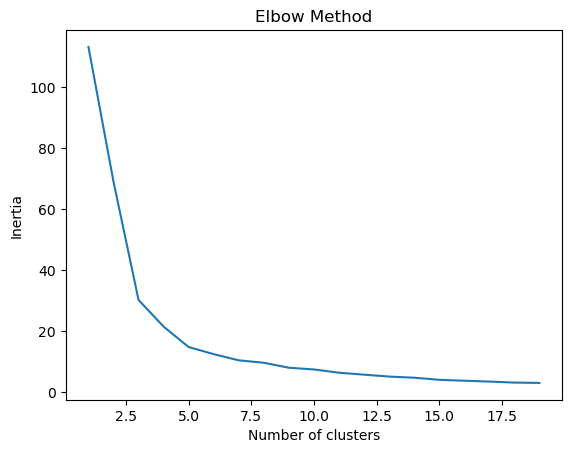

In [75]:
# using the elbow method , to choose the optimal number of clusters
inertia = [] #empty list to store the inertia values of different clusters numbers
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(accident_df)
    inertia.append(kmeans.inertia_)

# ploting the elbow on my diagram
plt.plot(range(1, 20), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [76]:
# fitting my data into kmeans model
kmeans = KMeans(5)
kmeans.fit(accident_df)
# getting my cluster labels and setting it to variable
labels = kmeans.labels_
labels

C:\Users\olada\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 3, 0, ..., 0, 3, 0])

In [77]:
# gettting the centroids
clusters=kmeans.cluster_centers_
clusters

array([[-0.36222849, 53.75941016],
       [-0.8177225 , 53.80799228],
       [-0.09147249, 53.57621063],
       [-0.64717868, 53.58547258],
       [-0.2715766 , 54.0433033 ]])

In [78]:
# cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [accident_df.columns])
# cluster_centers     

In [79]:
kmeans.inertia_

14.803123033206505

In [80]:
# predicting the cluster for each data point after fitting the K-Means clustering algorithm to the accident_df data.
y_kmeans = kmeans.fit_predict(accident_df)
y_kmeans


C:\Users\olada\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 3, 1, ..., 1, 3, 1])

In [84]:
from IPython.display import display

In [85]:
center_lat = accident_df[:, 1].mean()
center_lng = accident_df[:, 0].mean()

# Create a DataFrame from accident_df and y_kmeans
accident_clusters = pd.DataFrame(accident_df, columns=['longitude', 'latitude'])
accident_clusters['cluster'] = y_kmeans

# Create a folium map centered around the mean coordinates
my_map = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# Define a list of colors for clusters
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta']

# Plot each cluster
for cluster_num, group in accident_clusters.groupby('cluster'):
    color = colors[cluster_num % len(colors)] # Cycle through colors
    for index, row in group.iterrows():
        folium.CircleMarker([row['latitude'], row['longitude']], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(my_map)

# Add centroids (if 'clusters' variable is available with centroids)
if 'clusters' in locals():
    for lat, lon in zip(clusters[:, 1], clusters[:, 0]):
        folium.Marker([lat, lon], icon=folium.Icon(color='red', icon='star')).add_to(my_map)

# Display the map
display(my_map)


In [86]:
# evaluating the Kmeans performance using the internal metrics
db_score = davies_bouldin_score(accident_df, y_kmeans)
print(f'Davies-Bouldin Index: {db_score:.3f}')


s_score = silhouette_score(accident_df, y_kmeans)
print(f'Silhouette Coefficient: {s_score:.3f}')

c_score = calinski_harabasz_score(accident_df, y_kmeans)
print(f'Calinski Harabasz Score: {c_score:.3f}')

Davies-Bouldin Index: 0.627
Silhouette Coefficient: 0.622
Calinski Harabasz Score: 2757.194


__kMedoids__

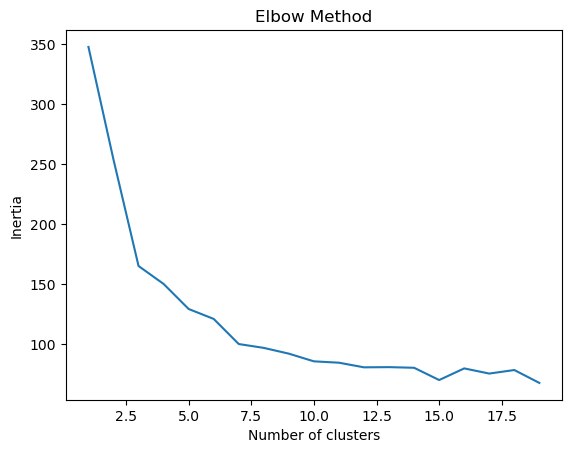

In [87]:
# using the elbow method , to choose the optimal number of clusters
inertia = []
for k in range(1, 20):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(accident_df)
    inertia.append(kmedoids.inertia_)
# plotting the elbow method
plt.plot(range(1, 20), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [88]:
# fitting my data into kmedoids model
kmedoids=KMedoids(n_clusters=5,random_state=0)
kmedoids.fit(accident_df)
# getting my cluster labels and setting it to variable
labels_2 = kmedoids.labels_

In [89]:
kmedoids.inertia_

129.43243994964507

In [90]:
# gettting the centroids
cluster_centers_2=kmedoids.cluster_centers_
cluster_centers_2

array([[-0.38317 , 53.750542],
       [-0.205244, 54.0828  ],
       [-0.29902 , 53.768354],
       [-0.662783, 53.596242],
       [-0.083752, 53.560873]])

In [91]:
# predicting the cluster for each data point after fitting the K-Medoids clustering algorithm to the accident_df data.
y_kmedoids = kmedoids.fit_predict(accident_df)
y_kmedoids

array([0, 3, 2, ..., 2, 3, 0], dtype=int64)

In [92]:
# checking the performance of the k-medoid clustering using the internal measures 
db_score = davies_bouldin_score(accident_df, y_kmedoids)
print(f'Davies-Bouldin Index: {db_score:.3f}')


s_score = silhouette_score(accident_df, y_kmedoids)
print(f'Silhouette Coefficient: {s_score:.3f}')

c_score = calinski_harabasz_score(accident_df, y_kmedoids)
print(f'Calinski Harabasz Score: {c_score:.3f}')

Davies-Bouldin Index: 0.721
Silhouette Coefficient: 0.434
Calinski Harabasz Score: 1989.319


In [93]:

# Combine accident_df and labels_2 into a Pandas DataFrame
accident_clusters = pd.DataFrame(accident_df, columns=['longitude', 'latitude'])
accident_clusters['cluster'] = labels_2

# Create a folium map centered around the mean coordinates
my_map = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# Define a list of colors for clusters
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta']

# Plot each cluster
for cluster_num, group in accident_clusters.groupby('cluster'):
    color = colors[cluster_num % len(colors)] # Cycle through colors
    for index, row in group.iterrows():
        folium.CircleMarker([row['latitude'], row['longitude']], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(my_map)

# Add centroids from cluster_centers_2
for lat, lon in zip(cluster_centers_2[:, 1], cluster_centers_2[:, 0]):
    folium.Marker([lat, lon], icon=folium.Icon(color='red', icon='star')).add_to(my_map)

# Display the map
display(my_map)


# Question 6

__Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?__

In [664]:
# importing necessary library for this question
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [665]:
# Reading data from the database using the SQL query and storing it in pandas dataframe
full_acc_df=pd.read_sql('SELECT * FROM accident  WHERE accident_year =2020 ' ,con)

In [666]:
# getting the overview of the dataset
full_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [667]:
# converting the time into date-time format and setting it to a new column
full_acc_df['converted_time'] = pd.DatetimeIndex(full_acc_df['time'])
full_acc_df['converted_time']
# extracting the hours from the coverted_time and setting it to a new column
full_acc_df['hours'] = pd.DatetimeIndex(full_acc_df['converted_time']).hour
full_acc_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_time,hours
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,2023-08-14 09:00:00,9
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,2023-08-14 13:55:00,13
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,2023-08-14 01:25:00,1
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,2023-08-14 01:50:00,1
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763,2023-08-14 02:25:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1,2023-08-14 14:30:00,14
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,2023-08-14 15:05:00,15
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,2023-08-14 12:42:00,12
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,2023-08-14 14:00:00,14


In [668]:
# dropping columns that wont be needed
# full_acc_df.drop(['accident_index','accident_year','accident_reference','location_easting_osgr','local_authority_ons_district','location_northing_osgr','number_of_casualties','date','local_authority_highway','first_road_class','first_road_number','second_road_class','second_road_number','lsoa_of_accident_location','converted_time','time','trunk_road_flag'],axis=1, inplace= True)
full_acc_df = full_acc_df.select_dtypes(include=['int64', 'float64'])

full_acc_df

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,10,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,9
1,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,9,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,13
2,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,1,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,1
3,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,17,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,1
4,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,1,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,918,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,14
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,922,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,15
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,910,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,12
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,932,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,14


In [669]:
full_acc_df

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,10,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,9
1,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,9,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,13
2,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,1,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,1
3,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,17,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,1
4,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,1,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,918,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,14
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,922,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,15
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,910,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,12
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,932,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,14


In [670]:
#getting the overview info of  the columns left
full_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_year                                91199 non-null  int64  
 1   location_easting_osgr                        91185 non-null  float64
 2   location_northing_osgr                       91185 non-null  float64
 3   longitude                                    91185 non-null  float64
 4   latitude                                     91185 non-null  float64
 5   police_force                                 91199 non-null  int64  
 6   accident_severity                            91199 non-null  int64  
 7   number_of_vehicles                           91199 non-null  int64  
 8   number_of_casualties                         91199 non-null  int64  
 9   day_of_week                                  91199 non-null  int64  
 10

In [671]:
# checking how many NAn value exists in the column
full_acc_df['longitude'].isna().sum()

14

In [672]:
# checking how many NAn value exists in the column
full_acc_df['latitude'].isna().sum()

14

In [673]:
# grouping the accident data by police force and getting the median of each group
grouped_police_force = full_acc_df.groupby('police_force').median()

# Created a function  to fill NaN values with group median
def fill_with_median(data):
    if pd.isnull(data['longitude']):
        data['longitude'] = grouped_police_force.loc[data['police_force']]['longitude']
    if pd.isnull(data['latitude']):
        data['latitude'] = grouped_police_force.loc[data['police_force']]['latitude']
    if pd.isnull(data['location_northing_osgr']):
        data['location_northing_osgr'] = grouped_police_force.loc[data['police_force']]['location_northing_osgr']
    if pd.isnull(data['location_easting_osgr']):
        data['location_easting_osgr'] = grouped_police_force.loc[data['police_force']]['location_easting_osgr']
    return data

# Apply the function to fill NaN values based on the group median
full_acc_df = full_acc_df.apply(fill_with_median, axis=1)


In [674]:
# All Nan values have been filled
full_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_year                                91199 non-null  float64
 1   location_easting_osgr                        91199 non-null  float64
 2   location_northing_osgr                       91199 non-null  float64
 3   longitude                                    91199 non-null  float64
 4   latitude                                     91199 non-null  float64
 5   police_force                                 91199 non-null  float64
 6   accident_severity                            91199 non-null  float64
 7   number_of_vehicles                           91199 non-null  float64
 8   number_of_casualties                         91199 non-null  float64
 9   day_of_week                                  91199 non-null  float64
 10

In [675]:
# initializing an Isolation Forest model with specified parameters for outlier detection (with 100 base estimators and 30% contamination)
iforest=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.30,random_state=42)


In [676]:
# fitting the iforest to full_acc_df to predict the outliers in the data
i_predict=iforest.fit_predict(full_acc_df)
i_predict

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



array([-1,  1,  1, ..., -1, -1, -1])

In [677]:
# adding new column named 'iforest_outlier' to the DataFrame  full_acc_df
full_acc_df['iforest_outlier'] = i_predict


In [678]:
# retrieving rows where iforest_outlier=-1
forest_pred=full_acc_df[full_acc_df['iforest_outlier']==-1]
forest_pred

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,-1.0,0.0,-1.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,9.0,-1
7,2020.0,536115.0,182297.0,-0.039390,51.523195,1.0,2.0,2.0,1.0,4.0,5.0,3.0,11.0,3.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,8.0,2.0,0.0,0.0,1.0,1.0,2.0,3.0,-1
11,2020.0,534377.0,197476.0,-0.058620,51.660013,1.0,2.0,3.0,4.0,4.0,32.0,3.0,10.0,3.0,40.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,3.0,-1
12,2020.0,553943.0,190802.0,0.221108,51.595036,1.0,3.0,2.0,2.0,4.0,15.0,3.0,12.0,3.0,50.0,0.0,-1.0,0.0,-1.0,9.0,9.0,1.0,7.0,1.0,0.0,0.0,1.0,3.0,2.0,4.0,-1
15,2020.0,553007.0,190580.0,0.207510,51.593297,1.0,1.0,1.0,1.0,4.0,15.0,3.0,12.0,3.0,50.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,7.0,2.0,0.0,0.0,2.0,1.0,2.0,4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020.0,343034.0,731654.0,-2.926320,56.473539,99.0,2.0,2.0,1.0,4.0,918.0,4.0,959.0,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,14.0,-1
91195,2020.0,257963.0,658891.0,-4.267565,55.802353,99.0,3.0,1.0,1.0,6.0,922.0,6.0,0.0,9.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,15.0,-1
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,-1.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,12.0,-1
91197,2020.0,277161.0,674852.0,-3.968753,55.950940,99.0,3.0,2.0,1.0,3.0,932.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,14.0,-1


In [679]:
# columns that isolation forest picked for outliers 
forest_pred_column = forest_pred.columns[forest_pred.eq(-1).any()].tolist()
print(len(forest_pred_column),'columns detected as outliers')
print('\n')
print(forest_pred_column)


15 columns detected as outliers


['local_authority_district', 'speed_limit', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'iforest_outlier']


In [680]:
# retrieving column names that have -1 Values 
count= 0
for i in full_acc_df.columns:
    if -1 in full_acc_df[i].values:
        count=count+1
        print(i)
        
print(count,' columns actually have outliers')
    



local_authority_district
speed_limit
junction_detail
junction_control
second_road_class
second_road_number
pedestrian_crossing_human_control
pedestrian_crossing_physical_facilities
light_conditions
weather_conditions
road_surface_conditions
special_conditions_at_site
carriageway_hazards
did_police_officer_attend_scene_of_accident
trunk_road_flag
iforest_outlier
16  columns actually have outliers


In [681]:
# This demonstrates that, even after tweaking the hyperparameter, the isolation forest is unable DETECT all columns WITH outliers(e.g.weather_conditions): 0.30 contamination 
full_acc_df[full_acc_df['weather_conditions']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
79777,2020.0,343681.0,154706.0,-2.809007,51.288686,52.0,1.0,1.0,1.0,4.0,-1.0,3.0,371.0,6.0,60.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,2.0,1.0,-1


In [682]:
## This demonstrates that, even after tweaking the hyperparameter, the isolation forest was only able to capture 27000 of suspected rows of where  outliers occured and unable to capture all rows capture all the rows with outliers: @ 0.30 contamination 

full_acc_df[full_acc_df['junction_control']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,-1.0,0.0,-1.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,9.0,-1
3,2020.0,538676.0,184371.0,-0.001683,51.541210,1.0,2.0,1.0,1.0,4.0,17.0,3.0,11.0,6.0,30.0,0.0,-1.0,0.0,-1.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1
12,2020.0,553943.0,190802.0,0.221108,51.595036,1.0,3.0,2.0,2.0,4.0,15.0,3.0,12.0,3.0,50.0,0.0,-1.0,0.0,-1.0,9.0,9.0,1.0,7.0,1.0,0.0,0.0,1.0,3.0,2.0,4.0,-1
13,2020.0,526375.0,174240.0,-0.182588,51.453048,1.0,2.0,3.0,1.0,4.0,10.0,6.0,0.0,6.0,20.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1
15,2020.0,553007.0,190580.0,0.207510,51.593297,1.0,1.0,1.0,1.0,4.0,15.0,3.0,12.0,3.0,50.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,7.0,2.0,0.0,0.0,2.0,1.0,2.0,4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91186,2020.0,253049.0,666010.0,-4.349740,55.864792,99.0,3.0,2.0,1.0,2.0,926.0,6.0,0.0,6.0,30.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,-1.0,13.0,-1
91191,2020.0,298547.0,696827.0,-3.634775,56.153290,99.0,3.0,2.0,1.0,3.0,934.0,3.0,977.0,6.0,30.0,0.0,-1.0,0.0,-1.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,7.0,-1
91193,2020.0,286242.0,717023.0,-3.841439,56.331864,99.0,3.0,1.0,1.0,3.0,934.0,6.0,0.0,9.0,60.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,0.0,7.0,2.0,2.0,-1.0,12.0,-1
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,-1.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,12.0,-1


__Cleaning the Outliers__

__local_authority_district__

In [683]:
full_acc_df[full_acc_df['local_authority_district']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
20886,2020.0,554799.0,194187.0,0.234951,51.625215,1.0,3.0,2.0,1.0,3.0,-1.0,1.0,25.0,3.0,70.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,20.0,-1
20887,2020.0,544987.0,192610.0,0.092654,51.613656,1.0,3.0,2.0,1.0,6.0,-1.0,4.0,173.0,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,1.0,1.0,2.0,9.0,1
20888,2020.0,533681.0,180745.0,-0.075042,51.509829,1.0,3.0,2.0,1.0,4.0,-1.0,3.0,100.0,3.0,30.0,6.0,2.0,3.0,100.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,3.0,1
20889,2020.0,531162.0,181123.0,-0.111179,51.513816,1.0,3.0,2.0,1.0,1.0,-1.0,3.0,4.0,6.0,20.0,3.0,2.0,4.0,400.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,18.0,1
20890,2020.0,533550.0,180777.0,-0.076916,51.510148,1.0,3.0,1.0,1.0,5.0,-1.0,6.0,0.0,6.0,20.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86668,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,2.0,1.0,4.0,-1.0,4.0,4306.0,6.0,30.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,-1.0,8.0,-1
86705,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,1.0,1.0,4.0,-1.0,6.0,0.0,6.0,60.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,-1.0,18.0,-1
86785,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,2.0,1.0,6.0,-1.0,4.0,4300.0,6.0,60.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,-1.0,10.0,-1
86916,2020.0,260040.0,280830.0,-4.058956,52.407537,63.0,3.0,2.0,1.0,4.0,-1.0,3.0,44.0,6.0,30.0,8.0,4.0,6.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,1.0,2.0,-1.0,10.0,-1


In [684]:
# this examples demonstrate that for every police_code there are  several code number of the local authority attached to it
print(full_acc_df[full_acc_df['police_force']==6.]['local_authority_district'].unique())
print(full_acc_df[full_acc_df['police_force']==7.]['local_authority_district'].unique())
print(full_acc_df[full_acc_df['police_force']==10.]['local_authority_district'].unique())

[ -1. 102. 107. 110. 109. 100. 114. 112. 101. 106. 104.]
[128. 130. 129. 124.  -1.]
[147. 150. 139. 148. 146. 149.]


In [685]:
# replacing -1 to NA
full_acc_df['local_authority_district'] = full_acc_df['local_authority_district'].replace(-1, pd.NA)

In [686]:
# checking outcome
full_acc_df[full_acc_df['local_authority_district'].isnull()]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
20886,2020.0,554799.0,194187.0,0.234951,51.625215,1.0,3.0,2.0,1.0,3.0,NaN,1.0,25.0,3.0,70.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,20.0,-1
20887,2020.0,544987.0,192610.0,0.092654,51.613656,1.0,3.0,2.0,1.0,6.0,NaN,4.0,173.0,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,1.0,1.0,2.0,9.0,1
20888,2020.0,533681.0,180745.0,-0.075042,51.509829,1.0,3.0,2.0,1.0,4.0,NaN,3.0,100.0,3.0,30.0,6.0,2.0,3.0,100.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,3.0,1
20889,2020.0,531162.0,181123.0,-0.111179,51.513816,1.0,3.0,2.0,1.0,1.0,NaN,3.0,4.0,6.0,20.0,3.0,2.0,4.0,400.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,18.0,1
20890,2020.0,533550.0,180777.0,-0.076916,51.510148,1.0,3.0,1.0,1.0,5.0,NaN,6.0,0.0,6.0,20.0,0.0,-1.0,0.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86668,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,2.0,1.0,4.0,NaN,4.0,4306.0,6.0,30.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,-1.0,8.0,-1
86705,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,1.0,1.0,4.0,NaN,6.0,0.0,6.0,60.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,-1.0,18.0,-1
86785,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,2.0,1.0,6.0,NaN,4.0,4300.0,6.0,60.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,-1.0,10.0,-1
86916,2020.0,260040.0,280830.0,-4.058956,52.407537,63.0,3.0,2.0,1.0,4.0,NaN,3.0,44.0,6.0,30.0,8.0,4.0,6.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,1.0,2.0,-1.0,10.0,-1


In [687]:
# counting the unique values in local_authority_district
full_acc_df['local_authority_district'].value_counts()

300.0    1801
9.0      1063
1.0      1029
204.0     997
10.0      932
         ... 
915.0      21
57.0       17
941.0      13
936.0      11
933.0       9
Name: local_authority_district, Length: 376, dtype: int64

In [688]:
# grouping  the dataframe by police_force and calculating the median of local_authority_district within each group
grouped_police = full_acc_df.groupby('police_force')['local_authority_district'].median()

# Fillin NaN values in 'local_authority_district' with the corresponding group median
full_acc_df['local_authority_district'] = full_acc_df.apply(lambda row: grouped_police[row['police_force']] if pd.isnull(row['local_authority_district']) else row['local_authority_district'], axis=1)



In [689]:
# checking outcome
full_acc_df[full_acc_df['local_authority_district'].isnull()]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


____speed_limit__

In [690]:
# checking the unique value counts
full_acc_df['speed_limit'].value_counts()

 30.0    52260
 60.0    11408
 20.0    11183
 40.0     7867
 70.0     4687
 50.0     3782
-1.0        12
Name: speed_limit, dtype: int64

In [691]:

# Calculate the median of each group
road_surface_conditions = full_acc_df.groupby('road_surface_conditions').median()

# Updated function to fill -1 instead of NaN values with group median
def fill_with_median(row):
    if row['speed_limit'] == -1:
        row['speed_limit'] = road_surface_conditions.loc[row['road_surface_conditions']]['speed_limit']
    return row

# Apply the function to fill -1 values with group median for each row
full_acc_df = full_acc_df.apply(lambda row: fill_with_median(row), axis=1)

In [692]:
# checking if there is -1 in speed_limit
full_acc_df['speed_limit'].value_counts()

30.0    52272
60.0    11408
20.0    11183
40.0     7867
70.0     4687
50.0     3782
Name: speed_limit, dtype: int64

__junction_detail__

In [693]:
# checking the unique value counts
full_acc_df['junction_detail'].value_counts()

 0.0     37978
 3.0     25626
 6.0      8429
 1.0      7326
 9.0      4705
 8.0      1887
 99.0     1508
 2.0      1300
 7.0      1279
 5.0      1159
-1.0         2
Name: junction_detail, dtype: int64

In [694]:
full_acc_df[full_acc_df['junction_detail']==-1]
# only two rows in the juntion detail has -1, hence i can afford to drop this rows, as it will not have material effect onmy model

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
65042,2020.0,482277.0,238418.0,-0.801898,52.038080,43.0,3.0,2.0,1.0,3.0,479.0,6.0,0.0,6.0,20.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,15.0,1.0
80880,2020.0,375358.0,165623.0,-2.355525,51.389105,52.0,3.0,2.0,1.0,3.0,611.0,6.0,0.0,6.0,30.0,-1.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,8.0,1.0


In [695]:
# deleting the two rows
print(len(full_acc_df), 'before dropping rows')
full_acc_df=full_acc_df[full_acc_df['junction_detail']!=-1]
print(len(full_acc_df), 'after dropping rows')


91199 before dropping rows
91197 after dropping rows


__junction_detail__

In [696]:
# checking if-1 exists, however it discovered that the out lier here is 99
full_acc_df['junction_detail'].value_counts()

0.0     37978
3.0     25626
6.0      8429
1.0      7326
9.0      4705
8.0      1887
99.0     1508
2.0      1300
7.0      1279
5.0      1159
Name: junction_detail, dtype: int64

In [697]:
# replacing all 99 with Na
full_acc_df['junction_detail'] = full_acc_df['junction_detail'].replace(99, pd.NA)

In [698]:
median_y = full_acc_df['junction_detail'].median()

# Step 2: Replace NaN with the median in column 'junction_detail'
full_acc_df['junction_detail'].fillna(median_y, inplace=True)



In [699]:
full_acc_df['junction_detail'].value_counts()

0.0    37978
3.0    25626
1.0     8834
6.0     8429
9.0     4705
8.0     1887
2.0     1300
7.0     1279
5.0     1159
Name: junction_detail, dtype: int64

__junction_control__

In [700]:
full_acc_df[full_acc_df['junction_control']==-1]['junction_detail'].value_counts()
# in the stats book it states that"If item 1.16 (Junction Detail) is coded 00, leave 1.17(junction_control) blank"
# however  junction_control was filled with -1 here when junction detail is coded 00
# this -1 will need to be changed back to blank , however because of our machine learning model we cant leave the column black 
# hence for every 0 in junction_detail junction_control will be coded a unique number ==0

0.0    37976
9.0      106
3.0       87
8.0       72
1.0       32
6.0       12
7.0        9
2.0        2
5.0        1
Name: junction_detail, dtype: int64

In [701]:
# identifying the rows where junction_detail = 0 and junction_control =-1 and setting it to variable selected_rows
selected_rows = full_acc_df[(full_acc_df['junction_detail'] == 0) & (full_acc_df['junction_control'] == -1)]
#  For these selected rows, it updates the value of the 'junction_control' column to 0
full_acc_df.loc[selected_rows.index, 'junction_control'] = 0


In [702]:
full_acc_df[full_acc_df['junction_control']==-1]['junction_detail'].value_counts()
# checking

9.0    106
3.0     87
8.0     72
1.0     32
6.0     12
7.0      9
2.0      2
5.0      1
Name: junction_detail, dtype: int64

In [703]:
full_acc_df[full_acc_df['junction_control']==4]['junction_detail'].value_counts()

3.0    21911
1.0     6175
6.0     3934
9.0     3525
8.0     1729
2.0     1259
5.0      939
7.0      523
0.0        2
Name: junction_detail, dtype: int64

In [704]:
full_acc_df['junction_control'] = full_acc_df['junction_control'].replace(-1, pd.NA)

# Step 2: Calculate the median of column 'y' (ignoring NaN values)
median_y = full_acc_df['junction_control'].median()

# Step 3: Use boolean indexing to select rows where 'y' is NaN
selected_rows = full_acc_df[full_acc_df['junction_control'].isna()]

# Step 4: Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'junction_control'] = median_y

# Display the modified DataFrame



__pedestrian_crossing_human_control__

In [705]:
# retrieving all woes with -1
full_acc_df[full_acc_df['pedestrian_crossing_human_control']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
21561,2020.0,304102.0,529475.0,-3.487808,54.651230,3.0,3.0,1.0,1.0,2.0,60.0,6.0,0.0,6.0,30.0,6.0,2.0,6.0,0.0,-1.0,-1.0,4.0,5.0,2.0,-1.0,-1.0,2.0,2.0,2.0,22.0,-1.0
29707,2020.0,434725.0,572130.0,-1.458142,55.042479,10.0,3.0,2.0,1.0,3.0,148.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,7.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,18.0,1.0
29829,2020.0,425337.0,563390.0,-1.605819,54.964507,10.0,3.0,1.0,1.0,6.0,146.0,3.0,184.0,3.0,30.0,3.0,2.0,3.0,184.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,12.0,1.0
29834,2020.0,424645.0,563994.0,-1.616575,54.969968,10.0,3.0,1.0,1.0,7.0,147.0,3.0,186.0,6.0,30.0,3.0,2.0,6.0,0.0,-1.0,4.0,4.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0,20.0,-1.0
30017,2020.0,424383.0,573697.0,-1.619845,55.057172,10.0,3.0,2.0,1.0,6.0,148.0,4.0,1321.0,6.0,30.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79777,2020.0,343681.0,154706.0,-2.809007,51.288686,52.0,1.0,1.0,1.0,4.0,606.0,3.0,371.0,6.0,60.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,2.0,1.0,-1.0
81794,2020.0,385838.0,218187.0,-2.207055,51.862090,53.0,3.0,1.0,1.0,2.0,623.0,6.0,0.0,6.0,30.0,9.0,4.0,6.0,0.0,-1.0,1.0,1.0,5.0,2.0,0.0,0.0,1.0,2.0,2.0,16.0,-1.0
82325,2020.0,381547.0,221226.0,-2.269531,51.889288,53.0,3.0,2.0,1.0,7.0,625.0,3.0,417.0,6.0,30.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,10.0,1.0
91094,2020.0,226757.0,642246.0,-4.754274,55.642790,99.0,3.0,2.0,1.0,5.0,931.0,3.0,738.0,6.0,30.0,9.0,2.0,6.0,0.0,-1.0,-1.0,4.0,8.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,21.0,-1.0


In [706]:
# replacing all rows with -1 one with NaN
full_acc_df['pedestrian_crossing_human_control'] = full_acc_df['pedestrian_crossing_human_control'].replace(-1, pd.NA)

# calculating the median value 
median_y = full_acc_df['pedestrian_crossing_human_control'].median()

# Using boolean indexing to select rows where 'pedestrian_crossing_human_control' is NaN
selected_rows = full_acc_df[full_acc_df['pedestrian_crossing_human_control'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'pedestrian_crossing_human_control'] = median_y


In [707]:
# checking if it worked
full_acc_df[full_acc_df['pedestrian_crossing_human_control']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


__pedestrian_crossing_physical_facilities__

In [708]:
# retrieving all woes with -1
full_acc_df[full_acc_df['pedestrian_crossing_physical_facilities']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
21561,2020.0,304102.0,529475.0,-3.487808,54.651230,3.0,3.0,1.0,1.0,2.0,60.0,6.0,0.0,6.0,30.0,6.0,2.0,6.0,0.0,0.0,-1.0,4.0,5.0,2.0,-1.0,-1.0,2.0,2.0,2.0,22.0,-1.0
29707,2020.0,434725.0,572130.0,-1.458142,55.042479,10.0,3.0,2.0,1.0,3.0,148.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,-1.0,7.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,18.0,1.0
29829,2020.0,425337.0,563390.0,-1.605819,54.964507,10.0,3.0,1.0,1.0,6.0,146.0,3.0,184.0,3.0,30.0,3.0,2.0,3.0,184.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,12.0,1.0
30017,2020.0,424383.0,573697.0,-1.619845,55.057172,10.0,3.0,2.0,1.0,6.0,148.0,4.0,1321.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,13.0,1.0
31056,2020.0,425870.0,577080.0,-1.596262,55.087496,10.0,3.0,2.0,2.0,1.0,139.0,3.0,1171.0,1.0,30.0,1.0,2.0,3.0,1171.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,9.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75469,2020.0,530561.0,105130.0,-0.147408,50.830984,47.0,3.0,2.0,1.0,3.0,565.0,3.0,2010.0,1.0,20.0,1.0,4.0,3.0,2010.0,0.0,-1.0,1.0,9.0,-1.0,-1.0,-1.0,1.0,2.0,2.0,20.0,-1.0
79211,2020.0,202307.0,53568.0,-4.780158,50.348746,50.0,3.0,1.0,1.0,4.0,596.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,15.0,-1.0
79777,2020.0,343681.0,154706.0,-2.809007,51.288686,52.0,1.0,1.0,1.0,4.0,606.0,3.0,371.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,2.0,1.0,-1.0
82325,2020.0,381547.0,221226.0,-2.269531,51.889288,53.0,3.0,2.0,1.0,7.0,625.0,3.0,417.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,10.0,1.0


In [709]:
# replacing all rows with -1 one with NaN
full_acc_df['pedestrian_crossing_physical_facilities'] = full_acc_df['pedestrian_crossing_physical_facilities'].replace(-1, pd.NA)

# calculating the median value 
median_y = full_acc_df['pedestrian_crossing_physical_facilities'].median()

# Using boolean indexing to select rows where 'pedestrian_crossing_physical_facilities' is NaN
selected_rows = full_acc_df[full_acc_df['pedestrian_crossing_physical_facilities'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'pedestrian_crossing_physical_facilities'] = median_y

In [710]:
# checking if -1 still exists
full_acc_df[full_acc_df['pedestrian_crossing_physical_facilities']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


__light_conditions__

In [711]:
full_acc_df[full_acc_df['light_conditions']==-1]
# only one row in the light_conditionsl has -1, hence i can afford to drop this rows, as it will not have material effect onmy model

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
79777,2020.0,343681.0,154706.0,-2.809007,51.288686,52.0,1.0,1.0,1.0,4.0,606.0,3.0,371.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,2.0,1.0,-1.0


In [712]:
# dropping the rows
print(len(full_acc_df), 'before dropping rows')
full_acc_df=full_acc_df[full_acc_df['light_conditions']!=-1]
print(len(full_acc_df), 'after dropping rows')


91197 before dropping rows
91196 after dropping rows


__weather_conditions__

In [713]:
# light condition and weather condition coincendentally have -1 one in the same row, this row has been dropped in the above code
full_acc_df[full_acc_df['weather_conditions']== -1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


__road_surface_conditions__

In [714]:
full_acc_df[full_acc_df['road_surface_conditions']== -1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
21032,2020.0,297437.0,517966.0,-3.587037,54.546529,3.0,3.0,2.0,2.0,5.0,63.0,4.0,5345.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,1.0,2.0,2.0,16.0,-1.0
21039,2020.0,299302.0,516864.0,-3.557841,54.537004,3.0,3.0,1.0,1.0,6.0,63.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,1.0,2.0,2.0,8.0,-1.0
21042,2020.0,302614.0,525794.0,-3.509635,54.617876,3.0,3.0,2.0,1.0,5.0,60.0,3.0,595.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,2.0,2.0,1.0,17.0,-1.0
21115,2020.0,300076.0,510597.0,-3.543758,54.480859,3.0,2.0,1.0,1.0,5.0,63.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,2.0,2.0,2.0,7.0,-1.0
21134,2020.0,343036.0,553924.0,-2.889300,54.876823,3.0,3.0,2.0,1.0,4.0,62.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,1.0,2.0,2.0,12.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86642,2020.0,253710.0,222430.0,-4.126026,51.881527,63.0,3.0,2.0,1.0,4.0,751.5,4.0,4298.0,6.0,50.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,3.0,2.0,-1.0,8.0,-1.0
86774,2020.0,244350.0,200870.0,-4.252999,51.684963,63.0,3.0,2.0,1.0,4.0,751.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,7.0,9.0,-1.0,0.0,0.0,2.0,2.0,-1.0,23.0,-1.0
87047,2020.0,196200.0,236630.0,-4.969711,51.990646,63.0,3.0,2.0,1.0,5.0,752.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,9.0,-1.0,0.0,0.0,2.0,2.0,-1.0,18.0,-1.0
91094,2020.0,226757.0,642246.0,-4.754274,55.642790,99.0,3.0,2.0,1.0,5.0,931.0,3.0,738.0,6.0,30.0,9.0,2.0,6.0,0.0,0.0,0.0,4.0,8.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,21.0,-1.0


In [715]:
# Define a function to perform the replacements and deletions
# this function checks the weather condition and based on the weather condition it will replace -1 with the appropriate road surface condition
# for weather condition that cannot be determined the rows will be dropped def replace_and_delete(row):
def replace_and_delete(row):
    if row['weather_conditions'] == 1:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 1
    elif row['weather_conditions'] == 8:
        if row['road_surface_conditions'] == -1:
            return None  # Delete the row by returning None
    elif row['weather_conditions'] == -1:
        if row['road_surface_conditions'] == -1:
            return None
    elif row['weather_conditions'] == 2:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 2
    elif row['weather_conditions'] == 5:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 5
    elif row['weather_conditions'] == 3:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 3
    elif row['weather_conditions'] == 4:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 1
    elif row['weather_conditions'] == 7:
        if row['road_surface_conditions'] == -1:
            row['road_surface_conditions'] = 4
    elif row['weather_conditions'] == 9:
        if row['road_surface_conditions'] == -1:
            return None  # Delete the row by returning None
    return row

# Apply the function to the DataFrame to perform the replacements and deletions
full_acc_df = full_acc_df.apply(replace_and_delete, axis=1)

# Drop rows with None (rows marked for deletion)
full_acc_df = full_acc_df.dropna()

In [716]:
# checking outcome
full_acc_df[full_acc_df['road_surface_conditions']== -1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


__special_conditions_at_site__

In [717]:
# retrieving rows with -1
full_acc_df[full_acc_df['special_conditions_at_site']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
21559,2020.0,298169.0,520399.0,-3.576569,54.568533,3.0,3.0,2.0,3.0,7.0,63.0,6.0,0.0,6.0,30.0,3.0,4.0,3.0,595.0,0.0,0.0,4.0,2.0,2.0,-1.0,-1.0,2.0,2.0,2.0,17.0,-1.0
21561,2020.0,304102.0,529475.0,-3.487808,54.651230,3.0,3.0,1.0,1.0,2.0,60.0,6.0,0.0,6.0,30.0,6.0,2.0,6.0,0.0,0.0,0.0,4.0,5.0,2.0,-1.0,-1.0,2.0,2.0,2.0,22.0,-1.0
21602,2020.0,350349.0,577415.0,-2.779421,55.088677,3.0,3.0,2.0,1.0,4.0,62.0,4.0,6318.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0,2.0,-1.0,0.0,2.0,2.0,2.0,12.0,-1.0
21626,2020.0,311983.0,483825.0,-3.352117,54.242531,3.0,3.0,2.0,1.0,3.0,63.0,3.0,595.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,8.0,2.0,-1.0,-1.0,2.0,2.0,2.0,11.0,-1.0
29795,2020.0,434350.0,550281.0,-1.466614,54.846175,10.0,3.0,1.0,1.0,7.0,150.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,7.0,5.0,2.0,-1.0,-1.0,1.0,2.0,2.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70871,2020.0,552371.0,172585.0,0.190565,51.431785,46.0,3.0,1.0,1.0,5.0,532.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,9.0,1.0,-1.0,0.0,2.0,2.0,2.0,8.0,1.0
71425,2020.0,601577.0,141436.0,0.880011,51.136703,46.0,3.0,2.0,1.0,6.0,530.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,-1.0,1.0,2.0,2.0,20.0,1.0
73189,2020.0,603219.0,134086.0,0.899317,51.070116,46.0,3.0,2.0,2.0,5.0,530.0,4.0,2067.0,6.0,30.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,1.0,1.0,-1.0,0.0,2.0,2.0,2.0,15.0,1.0
81786,2020.0,418974.0,225488.0,-1.725465,51.927598,53.0,3.0,1.0,1.0,6.0,621.0,3.0,429.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,-1.0,-1.0,2.0,2.0,2.0,10.0,1.0


In [718]:
# replacing -1 to Nan
full_acc_df['special_conditions_at_site'] = full_acc_df['special_conditions_at_site'].replace(-1, pd.NA)

# Calculating the median of column 'special_conditions_at_site'
median_y = full_acc_df['special_conditions_at_site'].median()

#Using boolean indexing to select rows where 'special_conditions_at_site' is NaN
selected_rows = full_acc_df[full_acc_df['special_conditions_at_site'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'special_conditions_at_site'] = median_y


In [719]:
# checking result
full_acc_df[full_acc_df['special_conditions_at_site']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


__carriageway_hazards__

In [720]:
# retrieving rows with -1
full_acc_df[full_acc_df['carriageway_hazards']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
21559,2020.0,298169.0,520399.0,-3.576569,54.568533,3.0,3.0,2.0,3.0,7.0,63.0,6.0,0.0,6.0,30.0,3.0,4.0,3.0,595.0,0.0,0.0,4.0,2.0,2.0,0.0,-1.0,2.0,2.0,2.0,17.0,-1.0
21561,2020.0,304102.0,529475.0,-3.487808,54.651230,3.0,3.0,1.0,1.0,2.0,60.0,6.0,0.0,6.0,30.0,6.0,2.0,6.0,0.0,0.0,0.0,4.0,5.0,2.0,0.0,-1.0,2.0,2.0,2.0,22.0,-1.0
21597,2020.0,307097.0,536150.0,-3.443533,54.711757,3.0,3.0,1.0,1.0,3.0,60.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,-1.0,2.0,2.0,2.0,17.0,-1.0
21626,2020.0,311983.0,483825.0,-3.352117,54.242531,3.0,3.0,2.0,1.0,3.0,63.0,3.0,595.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,8.0,2.0,0.0,-1.0,2.0,2.0,2.0,11.0,-1.0
29795,2020.0,434350.0,550281.0,-1.466614,54.846175,10.0,3.0,1.0,1.0,7.0,150.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,7.0,5.0,2.0,0.0,-1.0,1.0,2.0,2.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71294,2020.0,607165.0,158675.0,0.969721,51.289517,46.0,3.0,2.0,1.0,6.0,540.0,3.0,2.0,3.0,70.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.0,2.0,2.0,1.0,12.0,1.0
71367,2020.0,572095.0,155133.0,0.465607,51.269364,46.0,2.0,2.0,2.0,4.0,536.0,6.0,0.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,4.0,2.0,0.0,-1.0,2.0,2.0,2.0,7.0,-1.0
71425,2020.0,601577.0,141436.0,0.880011,51.136703,46.0,3.0,2.0,1.0,6.0,530.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.0,1.0,2.0,2.0,20.0,1.0
81786,2020.0,418974.0,225488.0,-1.725465,51.927598,53.0,3.0,1.0,1.0,6.0,621.0,3.0,429.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.0,2.0,2.0,2.0,10.0,1.0


In [721]:
# replacing -1 to Nan
full_acc_df['carriageway_hazards'] = full_acc_df['carriageway_hazards'].replace(-1, pd.NA)

# Calculating the median of column 'carriageway_hazards'
median_y = full_acc_df['carriageway_hazards'].median()

#Using boolean indexing to select rows where 'carriageway_hazards' is NaN
selected_rows = full_acc_df[full_acc_df['carriageway_hazards'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'carriageway_hazards'] = median_y


In [722]:
# checking for outcome
full_acc_df[full_acc_df['carriageway_hazards']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


__did_police_officer_attend_scene_of_accident__

In [723]:
# retrieving rows with -1
full_acc_df[full_acc_df['did_police_officer_attend_scene_of_accident']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier


In [724]:
# checking unique value counts
full_acc_df['did_police_officer_attend_scene_of_accident'].value_counts()

1.0    62441
2.0    19444
3.0     9115
Name: did_police_officer_attend_scene_of_accident, dtype: int64

__police force__

In [725]:
# outlier is 99, retrieving all rows
full_acc_df[full_acc_df['police_force']==99]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
87363,2020.0,323358.0,657433.0,-3.224260,55.804069,99.0,3.0,1.0,1.0,4.0,929.0,3.0,701.0,6.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,6.0,1.0,2.0,0.0,0.0,2.0,2.0,-1.0,2.0,-1.0
87364,2020.0,328344.0,674151.0,-3.149167,55.955012,99.0,2.0,2.0,2.0,4.0,923.0,3.0,1140.0,6.0,30.0,6.0,2.0,3.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,7.0,-1.0
87365,2020.0,251672.0,669243.0,-4.373494,55.893393,99.0,2.0,3.0,1.0,4.0,926.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,-1.0,16.0,-1.0
87366,2020.0,250320.0,835075.0,-4.491377,57.381401,99.0,2.0,1.0,2.0,4.0,927.0,3.0,833.0,6.0,60.0,9.0,4.0,6.0,0.0,0.0,0.0,6.0,4.0,2.0,0.0,0.0,2.0,2.0,-1.0,16.0,-1.0
87367,2020.0,187099.0,688602.0,-5.419630,56.042804,99.0,3.0,1.0,1.0,4.0,913.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,2.0,-1.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020.0,343034.0,731654.0,-2.926320,56.473539,99.0,2.0,2.0,1.0,4.0,918.0,4.0,959.0,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,14.0,-1.0
91195,2020.0,257963.0,658891.0,-4.267565,55.802353,99.0,3.0,1.0,1.0,6.0,922.0,6.0,0.0,9.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,15.0,-1.0
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,2.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,12.0,-1.0
91197,2020.0,277161.0,674852.0,-3.968753,55.950940,99.0,3.0,2.0,1.0,3.0,932.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,14.0,-1.0


In [726]:
# getting the unique value cunts
full_acc_df['police_force'].value_counts()

1.0     20906
20.0     3927
99.0     3835
46.0     3402
47.0     3106
44.0     3016
43.0     2764
13.0     2764
50.0     2616
42.0     2536
6.0      2399
4.0      2353
45.0     2333
52.0     2042
14.0     2013
5.0      1717
16.0     1709
10.0     1687
31.0     1594
30.0     1462
22.0     1446
32.0     1396
41.0     1392
7.0      1363
36.0     1302
35.0     1241
12.0     1180
55.0     1158
33.0     1133
40.0     1078
37.0      982
54.0      961
62.0      958
34.0      886
21.0      861
23.0      855
63.0      767
3.0       743
53.0      694
60.0      658
11.0      601
17.0      570
61.0      487
48.0      107
Name: police_force, dtype: int64

In [727]:
# Calculate the median for each local authority district, excluding 99
medians = full_acc_df[full_acc_df['police_force'] != 99].groupby('local_authority_district')['police_force'].median()

# Calculate the global median of police_force, excluding 99, to be used as the default value
default_value = full_acc_df[full_acc_df['police_force'] != 99]['police_force'].median()

# Define a function that replaces 99 with the corresponding median or the default value
def replace_99(row):
    if row['police_force'] == 99:
        local_district = row['local_authority_district']
        if local_district in medians.index:
            return medians[local_district]
        else:
            # Return the default value if the local_district doesn't exist in medians
            return default_value
    else:
        return row['police_force']

# Apply the function to the police_force column
full_acc_df['police_force'] = full_acc_df.apply(replace_99, axis=1)


In [728]:
# checking the outcome
full_acc_df['police_force'].value_counts()

1.0     20906
20.0     7762
46.0     3402
47.0     3106
44.0     3016
43.0     2764
13.0     2764
50.0     2616
42.0     2536
6.0      2399
4.0      2353
45.0     2333
52.0     2042
14.0     2013
5.0      1717
16.0     1709
10.0     1687
31.0     1594
30.0     1462
22.0     1446
32.0     1396
41.0     1392
7.0      1363
36.0     1302
35.0     1241
12.0     1180
55.0     1158
33.0     1133
40.0     1078
37.0      982
54.0      961
62.0      958
34.0      886
21.0      861
23.0      855
63.0      767
3.0       743
53.0      694
60.0      658
11.0      601
17.0      570
61.0      487
48.0      107
Name: police_force, dtype: int64

In [729]:
# visualising first 5 rows of my data
full_acc_df.head()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours,iforest_outlier
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,-1.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,9.0,-1.0
1,2020.0,529337.0,176237.0,-0.139253,51.470327,1.0,3.0,1.0,2.0,2.0,9.0,3.0,3036.0,6.0,20.0,9.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,13.0,1.0
2,2020.0,526432.0,182761.0,-0.178719,51.529614,1.0,3.0,1.0,1.0,4.0,1.0,5.0,0.0,6.0,30.0,3.0,1.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
3,2020.0,538676.0,184371.0,-0.001683,51.541210,1.0,2.0,1.0,1.0,4.0,17.0,3.0,11.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
4,2020.0,529324.0,181286.0,-0.137592,51.515704,1.0,3.0,1.0,2.0,4.0,1.0,3.0,40.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0


In [730]:
# dropping the iforest_outlier column
full_acc_df.drop(['iforest_outlier'], axis=1, inplace=True)

In [731]:
count= 0
for i in full_acc_df.columns:
    if -1 in full_acc_df[i].values:
        count=count+1
        print(i)
        
print(count,' columns actually have outliers')

second_road_class
second_road_number
trunk_road_flag
3  columns actually have outliers


In [732]:
# retrieving rows with -1
full_acc_df[full_acc_df['second_road_class']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
24306,2020.0,334923.0,390235.0,-2.980333,53.404920,5.0,3.0,2.0,1.0,7.0,91.0,3.0,5038.0,6.0,30.0,1.0,9.0,-1.0,-1.0,9.0,9.0,4.0,9.0,9.0,9.0,9.0,1.0,3.0,2.0,20.0
25438,2020.0,334627.0,399720.0,-2.986758,53.490126,5.0,3.0,2.0,1.0,3.0,93.0,6.0,0.0,6.0,30.0,7.0,2.0,-1.0,-1.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,16.0
25560,2020.0,346868.0,390532.0,-2.800731,53.408928,5.0,3.0,2.0,1.0,5.0,90.0,6.0,0.0,6.0,30.0,3.0,4.0,-1.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,19.0
25594,2020.0,321710.0,385999.0,-3.177985,53.365056,5.0,2.0,1.0,1.0,6.0,95.0,4.0,5141.0,6.0,30.0,6.0,4.0,-1.0,-1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,16.0
25631,2020.0,341987.0,397862.0,-2.875501,53.474291,5.0,3.0,1.0,1.0,5.0,90.0,6.0,0.0,6.0,30.0,1.0,9.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86279,2020.0,290727.0,178973.0,-3.575625,51.499100,62.0,3.0,3.0,2.0,2.0,740.0,4.0,4265.0,6.0,30.0,8.0,4.0,-1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,8.0
86394,2020.0,318085.0,177732.0,-3.181307,51.492576,62.0,3.0,2.0,1.0,3.0,743.0,6.0,0.0,6.0,30.0,3.0,4.0,-1.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,16.0
86397,2020.0,317616.0,172399.0,-3.186817,51.444566,62.0,3.0,2.0,1.0,5.0,743.0,3.0,4160.0,6.0,30.0,3.0,4.0,-1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,18.0
86411,2020.0,320077.0,177332.0,-3.152530,51.489266,62.0,3.0,1.0,1.0,5.0,743.0,4.0,4487.0,6.0,30.0,3.0,4.0,-1.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,19.0


In [733]:
# replacing -1 to Nan
full_acc_df['second_road_class'] = full_acc_df['second_road_class'].replace(-1, pd.NA)

# Calculating the median of column 'second_road_class'
median_y = full_acc_df['second_road_class'].median()

#Using boolean indexing to select rows where 'second_road_class' is NaN
selected_rows = full_acc_df[full_acc_df['second_road_class'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'second_road_class'] = median_y


In [734]:
# confirmation
full_acc_df[full_acc_df['second_road_class']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours


__second_road_number__

In [735]:
# retrieveing rows with -1
full_acc_df[full_acc_df['second_road_number']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,-1.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,9.0
3,2020.0,538676.0,184371.0,-0.001683,51.541210,1.0,2.0,1.0,1.0,4.0,17.0,3.0,11.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0
12,2020.0,553943.0,190802.0,0.221108,51.595036,1.0,3.0,2.0,2.0,4.0,15.0,3.0,12.0,3.0,50.0,0.0,0.0,0.0,-1.0,9.0,9.0,1.0,7.0,1.0,0.0,0.0,1.0,3.0,2.0,4.0
13,2020.0,526375.0,174240.0,-0.182588,51.453048,1.0,2.0,3.0,1.0,4.0,10.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,-1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0
15,2020.0,553007.0,190580.0,0.207510,51.593297,1.0,1.0,1.0,1.0,4.0,15.0,3.0,12.0,3.0,50.0,0.0,0.0,0.0,-1.0,0.0,0.0,4.0,7.0,2.0,0.0,0.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91184,2020.0,343287.0,732055.0,-2.922301,56.477171,20.0,2.0,1.0,1.0,3.0,918.0,4.0,961.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,17.0
91186,2020.0,253049.0,666010.0,-4.349740,55.864792,20.0,3.0,2.0,1.0,2.0,926.0,6.0,0.0,6.0,30.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,-1.0,13.0
91191,2020.0,298547.0,696827.0,-3.634775,56.153290,20.0,3.0,2.0,1.0,3.0,934.0,3.0,977.0,6.0,30.0,0.0,0.0,0.0,-1.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,7.0
91193,2020.0,286242.0,717023.0,-3.841439,56.331864,20.0,3.0,1.0,1.0,3.0,934.0,6.0,0.0,9.0,60.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,0.0,7.0,2.0,2.0,-1.0,12.0


In [736]:
# retrieving rows with -1
full_acc_df[full_acc_df['second_road_number']==-1]['second_road_class'].unique()

array([0.0, 3.0, 4.0], dtype=object)

In [737]:
full_acc_df[full_acc_df['second_road_number']==-1]['second_road_class'].value_counts()
# in the stats book it states that"Enter the road number of the road whose class was entered at 1.18 (2nd Road Class)"
# however  second_road_number was filled with -1 here when second_road_class inserted with zero which is not a valid entry for a road class 
# this -1 will need to be changed back to blank , however because of our machine learning model we cant leave the column black 
# hence for every 0 in second_road_class,second_road_number will be coded a unique number ==0

0.0    37841
3.0      115
4.0        1
Name: second_road_class, dtype: int64

In [738]:
# identifying the rows where junction_detail = 0 and junction_control =-1 and setting it to variable selected_rows
selected_rows = full_acc_df[(full_acc_df['second_road_class'] == 0) & (full_acc_df['second_road_number'] == -1)]
#  For these selected rows, it updates the value of the 'junction_control' column to 0
full_acc_df.loc[selected_rows.index, 'second_road_number'] = 0


In [739]:
full_acc_df[full_acc_df['second_road_number']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
24306,2020.0,334923.0,390235.0,-2.980333,53.404920,5.0,3.0,2.0,1.0,7.0,91.0,3.0,5038.0,6.0,30.0,1.0,9.0,3.0,-1.0,9.0,9.0,4.0,9.0,9.0,9.0,9.0,1.0,3.0,2.0,20.0
25438,2020.0,334627.0,399720.0,-2.986758,53.490126,5.0,3.0,2.0,1.0,3.0,93.0,6.0,0.0,6.0,30.0,7.0,2.0,3.0,-1.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,16.0
25560,2020.0,346868.0,390532.0,-2.800731,53.408928,5.0,3.0,2.0,1.0,5.0,90.0,6.0,0.0,6.0,30.0,3.0,4.0,3.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,19.0
25594,2020.0,321710.0,385999.0,-3.177985,53.365056,5.0,2.0,1.0,1.0,6.0,95.0,4.0,5141.0,6.0,30.0,6.0,4.0,3.0,-1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,16.0
25631,2020.0,341987.0,397862.0,-2.875501,53.474291,5.0,3.0,1.0,1.0,5.0,90.0,6.0,0.0,6.0,30.0,1.0,9.0,3.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86394,2020.0,318085.0,177732.0,-3.181307,51.492576,62.0,3.0,2.0,1.0,3.0,743.0,6.0,0.0,6.0,30.0,3.0,4.0,3.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,16.0
86397,2020.0,317616.0,172399.0,-3.186817,51.444566,62.0,3.0,2.0,1.0,5.0,743.0,3.0,4160.0,6.0,30.0,3.0,4.0,3.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,18.0
86411,2020.0,320077.0,177332.0,-3.152530,51.489266,62.0,3.0,1.0,1.0,5.0,743.0,4.0,4487.0,6.0,30.0,3.0,4.0,3.0,-1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,19.0
86472,2020.0,260059.0,195490.0,-4.023760,51.640757,62.0,3.0,2.0,1.0,2.0,743.0,4.0,4295.0,6.0,20.0,8.0,4.0,3.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,16.0


In [740]:
full_acc_df['second_road_number'] = full_acc_df['second_road_number'].replace(-1, pd.NA)

# Calculating the median of column 'second_road_number'
median_y = full_acc_df['second_road_number'].median()

#Using boolean indexing to select rows where 'second_road_number' is NaN
selected_rows = full_acc_df[full_acc_df['second_road_number'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'second_road_number'] = median_y

In [741]:
# confirmation
full_acc_df[full_acc_df['second_road_number']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours


__trunk_road_flag__

In [742]:
# retrieving rows with -1
full_acc_df[full_acc_df['trunk_road_flag']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
84489,2020.0,232114.0,331086.0,-4.494658,52.851044,60.0,3.0,2.0,1.0,6.0,722.0,3.0,499.0,6.0,60.0,9.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,13.0
84490,2020.0,252536.0,371657.0,-4.210206,53.221455,60.0,3.0,2.0,1.0,6.0,720.0,3.0,5.0,6.0,30.0,8.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,2.0,1.0,-1.0,17.0
84491,2020.0,300594.0,381453.0,-3.493778,53.320654,60.0,3.0,1.0,1.0,4.0,723.0,6.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,3.0
84492,2020.0,328262.0,351293.0,-3.071730,53.054074,60.0,3.0,1.0,1.0,7.0,725.0,3.0,525.0,6.0,30.0,8.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,10.0
84493,2020.0,243868.0,376365.0,-4.342230,53.261261,60.0,3.0,2.0,1.0,7.0,720.0,4.0,5109.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020.0,343034.0,731654.0,-2.926320,56.473539,20.0,2.0,2.0,1.0,4.0,918.0,4.0,959.0,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,14.0
91195,2020.0,257963.0,658891.0,-4.267565,55.802353,20.0,3.0,1.0,1.0,6.0,922.0,6.0,0.0,9.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,15.0
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,20.0,2.0,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,2.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-1.0,12.0
91197,2020.0,277161.0,674852.0,-3.968753,55.950940,20.0,3.0,2.0,1.0,3.0,932.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-1.0,14.0


In [743]:
full_acc_df['trunk_road_flag'] = full_acc_df['trunk_road_flag'].replace(-1, pd.NA)

# Calculating the median of column 'trunk_road_flag'
median_y = full_acc_df['trunk_road_flag'].median()

#Using boolean indexing to select rows where 'trunk_road_flag' is NaN
selected_rows = full_acc_df[full_acc_df['trunk_road_flag'].isna()]

# Replace the selected rows with the median value
full_acc_df.loc[selected_rows.index, 'trunk_road_flag'] = median_y

In [744]:
# confirmation
full_acc_df[full_acc_df['trunk_road_flag']==-1]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours


In [745]:
full_acc_df

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,0.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,9.0
1,2020.0,529337.0,176237.0,-0.139253,51.470327,1.0,3.0,1.0,2.0,2.0,9.0,3.0,3036.0,6.0,20.0,9.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,13.0
2,2020.0,526432.0,182761.0,-0.178719,51.529614,1.0,3.0,1.0,1.0,4.0,1.0,5.0,0.0,6.0,30.0,3.0,1.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0
3,2020.0,538676.0,184371.0,-0.001683,51.541210,1.0,2.0,1.0,1.0,4.0,17.0,3.0,11.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0
4,2020.0,529324.0,181286.0,-0.137592,51.515704,1.0,3.0,1.0,2.0,4.0,1.0,3.0,40.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020.0,343034.0,731654.0,-2.926320,56.473539,20.0,2.0,2.0,1.0,4.0,918.0,4.0,959.0,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,14.0
91195,2020.0,257963.0,658891.0,-4.267565,55.802353,20.0,3.0,1.0,1.0,6.0,922.0,6.0,0.0,9.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,15.0
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,20.0,2.0,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,2.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,12.0
91197,2020.0,277161.0,674852.0,-3.968753,55.950940,20.0,3.0,2.0,1.0,3.0,932.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,14.0


In [746]:
# confirming outlier check
count= 0
for i in full_acc_df.columns:
    if -1 in full_acc_df[i].values:
        count=count+1
        print(i)
        
print(count,' columns actually have outliers')

0  columns actually have outliers


# Question 7

In [747]:
# importing all neccessary libraries
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV





In [748]:
# mapping  severity level-1, fatal and severity level-2,3 to non-fatal
full_acc_df=full_acc_df.replace({'accident_severity': {1:'Fatal', 2:'Non-Fatal', 3:'Non-Fatal'}})


In [749]:
full_acc_df

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,hours
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,Non-Fatal,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,0.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,9.0
1,2020.0,529337.0,176237.0,-0.139253,51.470327,1.0,Non-Fatal,1.0,2.0,2.0,9.0,3.0,3036.0,6.0,20.0,9.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,13.0
2,2020.0,526432.0,182761.0,-0.178719,51.529614,1.0,Non-Fatal,1.0,1.0,4.0,1.0,5.0,0.0,6.0,30.0,3.0,1.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0
3,2020.0,538676.0,184371.0,-0.001683,51.541210,1.0,Non-Fatal,1.0,1.0,4.0,17.0,3.0,11.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0
4,2020.0,529324.0,181286.0,-0.137592,51.515704,1.0,Non-Fatal,1.0,2.0,4.0,1.0,3.0,40.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020.0,343034.0,731654.0,-2.926320,56.473539,20.0,Non-Fatal,2.0,1.0,4.0,918.0,4.0,959.0,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,14.0
91195,2020.0,257963.0,658891.0,-4.267565,55.802353,20.0,Non-Fatal,1.0,1.0,6.0,922.0,6.0,0.0,9.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,15.0
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,20.0,Non-Fatal,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,2.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,12.0
91197,2020.0,277161.0,674852.0,-3.968753,55.950940,20.0,Non-Fatal,2.0,1.0,3.0,932.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,14.0


In [750]:
# getting my target variables and the value_counts of my target
Ytarget=full_acc_df['accident_severity']
Ytarget.value_counts()

Non-Fatal    89611
Fatal         1389
Name: accident_severity, dtype: int64

In [751]:
# getting my features and assigning it toa variable
Xfeatures=full_acc_df.drop(['accident_severity','did_police_officer_attend_scene_of_accident'],axis=1)

In [752]:
Xfeatures

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,hours
0,2020.0,521389.0,175144.0,-0.254001,51.462262,1.0,1.0,1.0,3.0,10.0,6.0,0.0,6.0,20.0,0.0,0.0,0.0,0.0,9.0,9.0,1.0,9.0,9.0,0.0,0.0,1.0,2.0,9.0
1,2020.0,529337.0,176237.0,-0.139253,51.470327,1.0,1.0,2.0,2.0,9.0,3.0,3036.0,6.0,20.0,9.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,13.0
2,2020.0,526432.0,182761.0,-0.178719,51.529614,1.0,1.0,1.0,4.0,1.0,5.0,0.0,6.0,30.0,3.0,1.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
3,2020.0,538676.0,184371.0,-0.001683,51.541210,1.0,1.0,1.0,4.0,17.0,3.0,11.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
4,2020.0,529324.0,181286.0,-0.137592,51.515704,1.0,1.0,2.0,4.0,1.0,3.0,40.0,6.0,30.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020.0,343034.0,731654.0,-2.926320,56.473539,20.0,2.0,1.0,4.0,918.0,4.0,959.0,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,14.0
91195,2020.0,257963.0,658891.0,-4.267565,55.802353,20.0,1.0,1.0,6.0,922.0,6.0,0.0,9.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,15.0
91196,2020.0,383664.0,810646.0,-2.271903,57.186317,20.0,2.0,1.0,4.0,910.0,4.0,979.0,6.0,60.0,8.0,2.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,12.0
91197,2020.0,277161.0,674852.0,-3.968753,55.950940,20.0,2.0,1.0,3.0,932.0,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,14.0


In [753]:
# fitting my feature and target variable into selectkbest algorthim for feature selection
feature_selector =SelectKBest(f_classif, k=28)
feature_selector.fit(Xfeatures, Ytarget)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [0] are constant.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



SelectKBest(k=28)

In [754]:
support= feature_selector.get_support()
feat_names= feature_selector.feature_names_in_[support]
feat_scores= feature_selector.scores_[support]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'accident_year'),
  Text(1, 0, 'location_easting_osgr'),
  Text(2, 0, 'location_northing_osgr'),
  Text(3, 0, 'longitude'),
  Text(4, 0, 'latitude'),
  Text(5, 0, 'police_force'),
  Text(6, 0, 'number_of_vehicles'),
  Text(7, 0, 'number_of_casualties'),
  Text(8, 0, 'day_of_week'),
  Text(9, 0, 'local_authority_district'),
  Text(10, 0, 'first_road_class'),
  Text(11, 0, 'first_road_number'),
  Text(12, 0, 'road_type'),
  Text(13, 0, 'speed_limit'),
  Text(14, 0, 'junction_detail'),
  Text(15, 0, 'junction_control'),
  Text(16, 0, 'second_road_class'),
  Text(17, 0, 'second_road_number'),
  Text(18, 0, 'pedestrian_crossing_human_control'),
  Text(19, 0, 'pedestrian_crossing_physical_facilities'),
  Text(20, 0, 'light_conditions'),
  Text(21, 0, 'weather_conditions'),
  Text(22, 0, 'road_surface_conditions'),
  Text(2

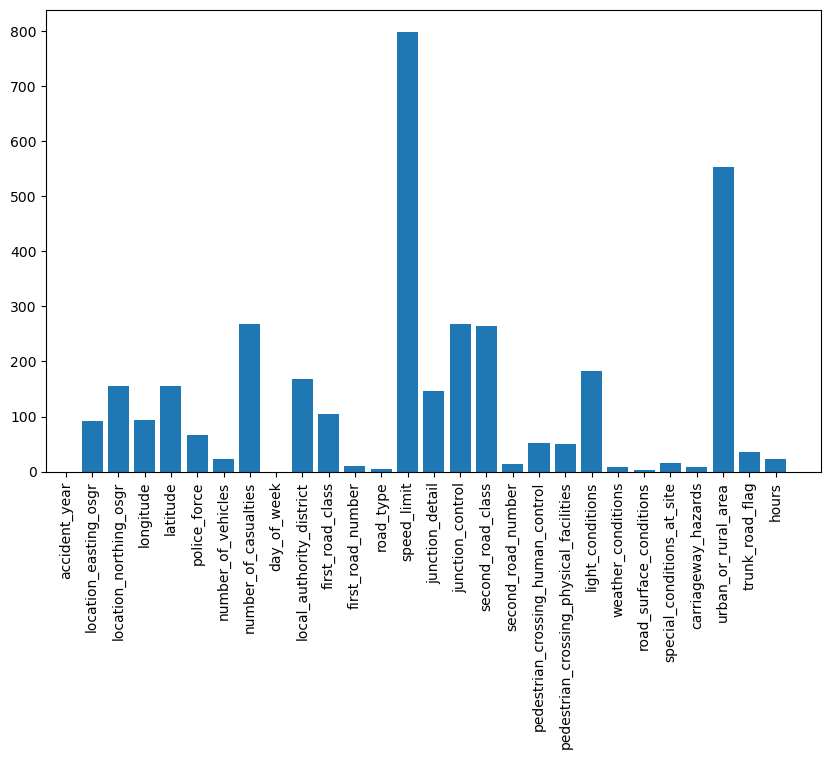

In [755]:
# plotting the features and their scores
plt.figure(figsize=(10, 6))
plt.bar(feat_names,feat_scores)
plt.xticks(rotation='vertical')

In [756]:
full_acc_df[['longitude','latitude','police_force','number_of_vehicles','local_authority_district','speed_limit','junction_detail','junction_control','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','light_conditions','special_conditions_at_site','carriageway_hazards','urban_or_rural_area','hours']]

,longitude,latitude,police_force,number_of_vehicles,local_authority_district,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hours
0,-0.254001,51.462262,1.0,1.0,10.0,20.0,0.0,0.0,9.0,9.0,1.0,0.0,0.0,1.0,9.0
1,-0.139253,51.470327,1.0,1.0,9.0,20.0,9.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,13.0
2,-0.178719,51.529614,1.0,1.0,1.0,30.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
3,-0.001683,51.541210,1.0,1.0,17.0,30.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0
4,-0.137592,51.515704,1.0,1.0,1.0,30.0,3.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,-2.926320,56.473539,20.0,2.0,918.0,30.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,14.0
91195,-4.267565,55.802353,20.0,1.0,922.0,30.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,15.0
91196,-2.271903,57.186317,20.0,2.0,910.0,60.0,8.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,12.0
91197,-3.968753,55.950940,20.0,2.0,932.0,30.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,14.0


<Axes: ylabel='accident_severity'>

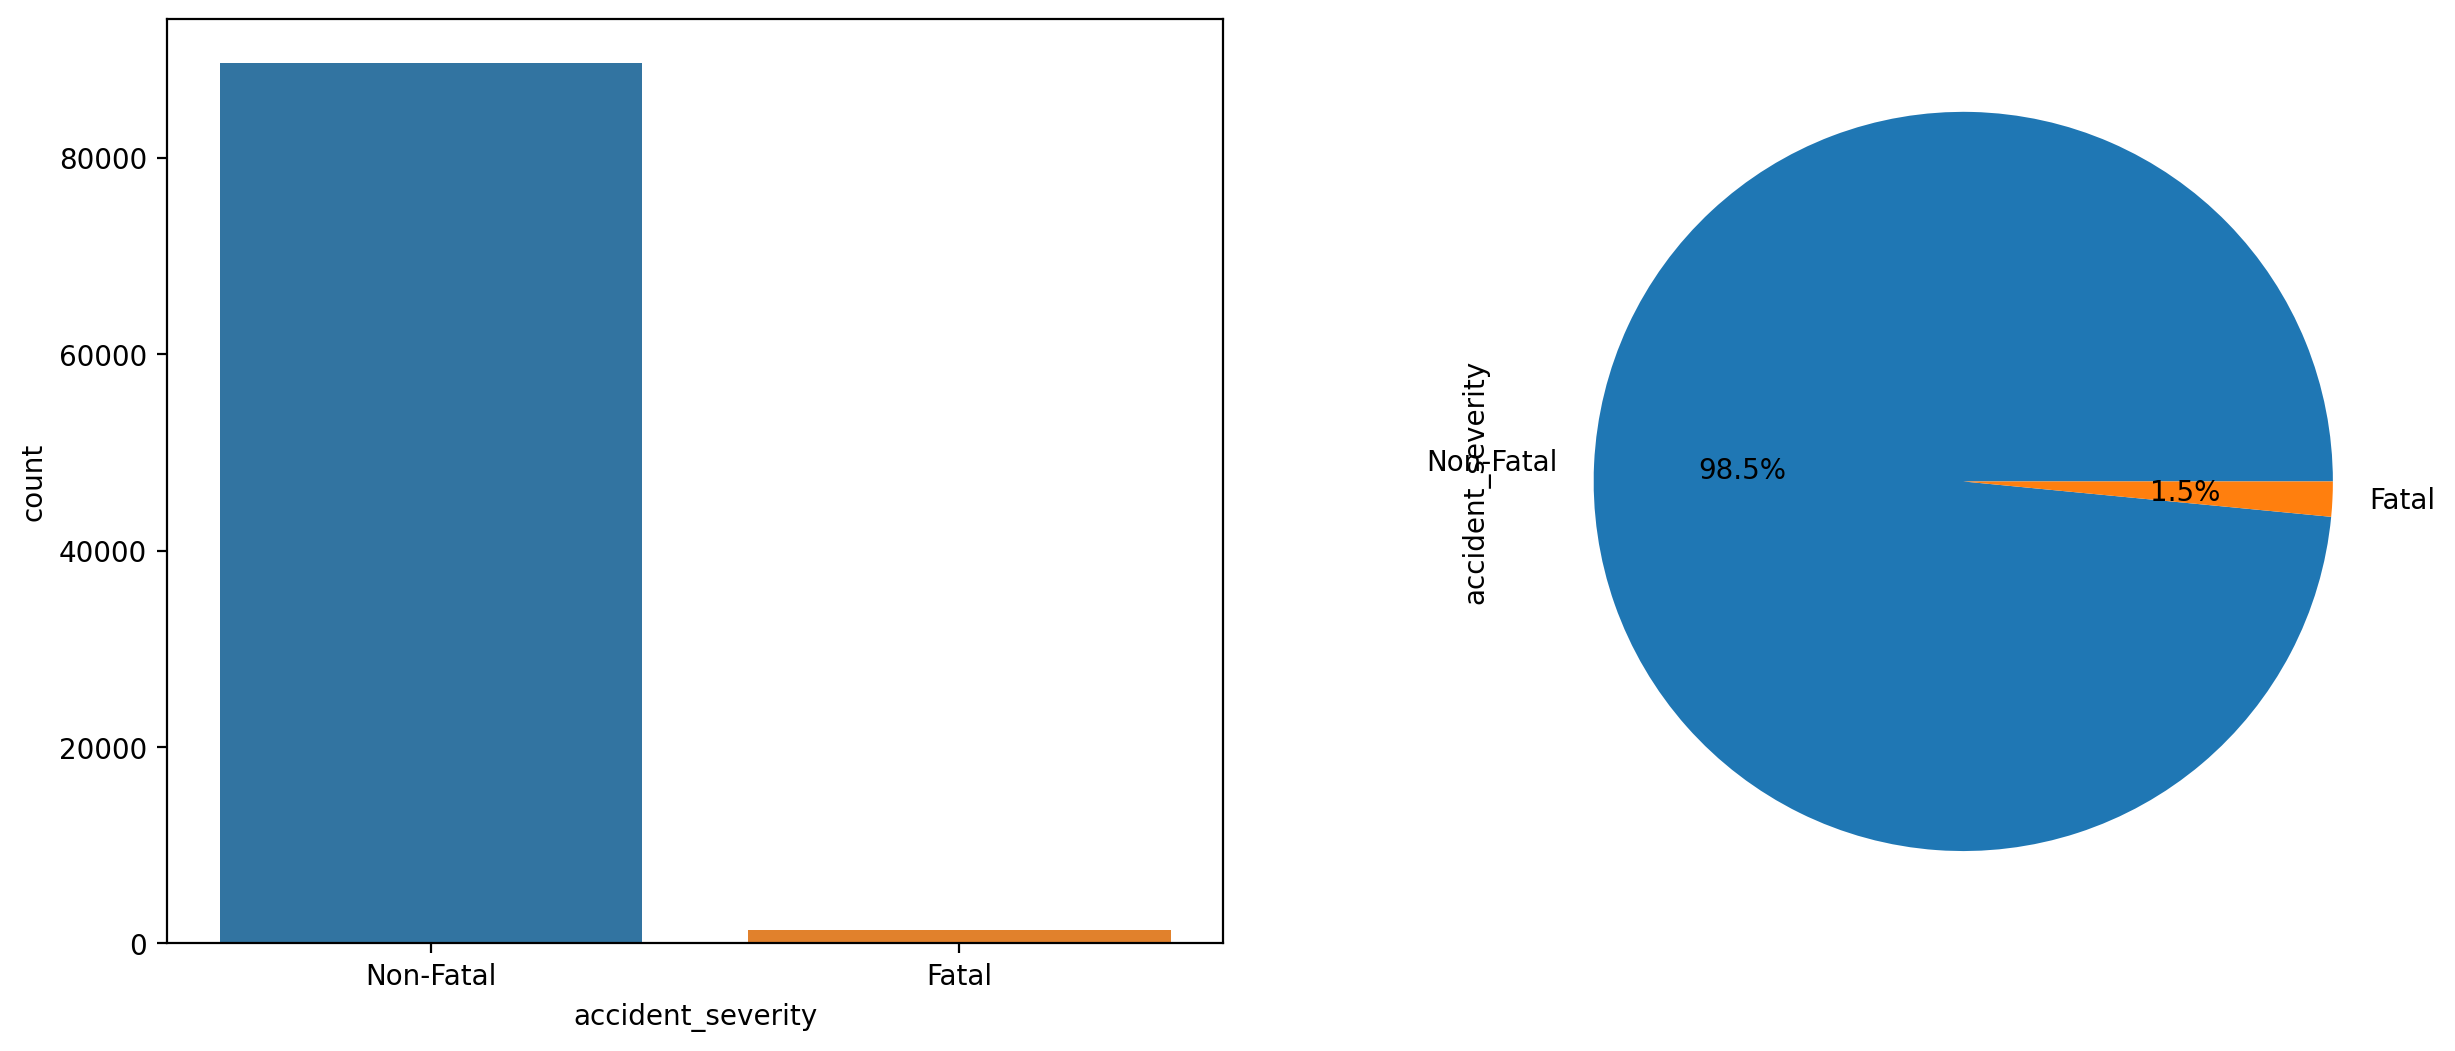

In [757]:
# checking the proportion of my target variable,this shows that my data is extremely imbalanced 
fig, ax_position=plt.subplots(1,2, figsize=(15,6),dpi=200)

sns.countplot(x ="accident_severity", data =full_acc_df, ax=ax_position[0])
full_acc_df["accident_severity"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax_position[1])

In [758]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(Xfeatures, Ytarget)
Xfeatures, Ytarget = X_resampled, y_resampled

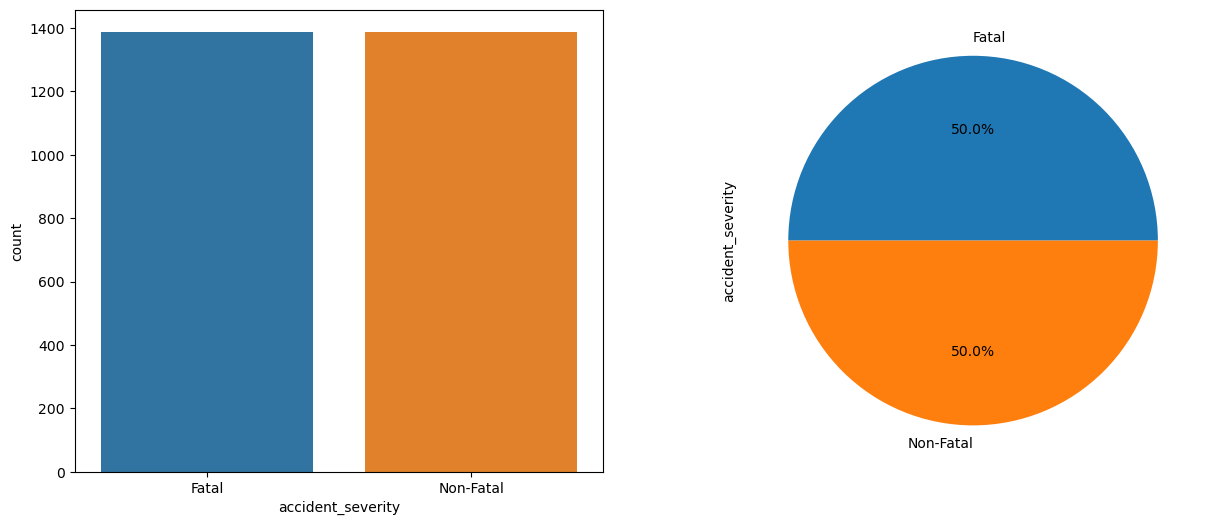

In [759]:
# visualising the new balanced dataset
bal_full_acc_df =pd.concat([X_resampled, y_resampled ], axis =1)#creating a dataframework for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6))# creating axis shell for the subplot
a = sns.countplot(x="accident_severity", data=bal_full_acc_df, ax=ax[0])
a = bal_full_acc_df["accident_severity"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[1])

In [760]:
# splitting my dataset to training and testing 0.80:0.20
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, Ytarget, test_size=0.20, random_state=42)

In [761]:
# setting my decision to a variablename
dTree=DecisionTreeClassifier()

In [762]:
# fitting the model with the data
dTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [763]:
# fitting the model with the test set after training, to make predictions
y_pred=dTree.predict(X_test)

In [764]:
# checking the training accuracy
accuracy_dTree=dTree.score(X_train,y_train)
accuracy_dTree

1.0

In [765]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fatal       0.62      0.62      0.62       284
   Non-Fatal       0.60      0.61      0.61       272

    accuracy                           0.61       556
   macro avg       0.61      0.61      0.61       556
weighted avg       0.61      0.61      0.61       556



In [766]:
# checking test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6133093525179856


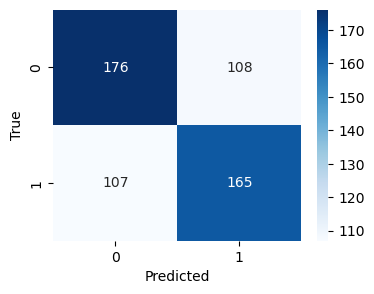

In [767]:
# visualising the confusing metrics
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [768]:
# getting the feature importance 
df_importance=pd.DataFrame(np.array([dTree.feature_names_in_,dTree.feature_importances_]).T,columns=['feature','importance'])

In [769]:
# ordering it an ascending order
df_importance.sort_values('importance', ascending=False)

,feature,importance
13,speed_limit,0.13486
27,hours,0.096123
4,latitude,0.092067
3,longitude,0.08066
1,location_easting_osgr,0.079016
9,local_authority_district,0.062154
11,first_road_number,0.060553
6,number_of_vehicles,0.057721
2,location_northing_osgr,0.041796
8,day_of_week,0.037955


In [782]:
# initializing several different classification models with their default parameters 
dt = DecisionTreeClassifier(random_state=42)
rf=RandomForestClassifier(random_state=42)
gb=GradientBoostingClassifier(random_state=42)
knn=KNeighborsClassifier()

In [783]:
#The VotingClassifier works by fitting the individual models to the data and then taking a vote on the predictions.
ensemble = VotingClassifier(estimators=[('dt',dt), ('gb', gb), ('rf', rf)])


In [784]:
# performing 5-fold cross-validation on the training data using an ensemble model and then prints the average accuracy
scores = cross_val_score(ensemble, X_train, y_train, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.03)


In [785]:
# fitting the ensemble model with the data
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [786]:
y_pred=ensemble.predict(X_test)

In [787]:
# classfication report on test set
print("classfication report")
print(classification_report(y_test,y_pred))

classfication report
              precision    recall  f1-score   support

       Fatal       0.70      0.68      0.69       284
   Non-Fatal       0.68      0.69      0.69       272

    accuracy                           0.69       556
   macro avg       0.69      0.69      0.69       556
weighted avg       0.69      0.69      0.69       556



In [788]:
# model evaluation performance on test set
accuracy_score(y_test, y_pred)

0.6888489208633094

In [789]:
accuracy = accuracy_score(y_test, y_pred)

# Rounding the accuracy to, say, 4 decimal places
rounded_accuracy = round(accuracy, 2)

print(rounded_accuracy)

0.69


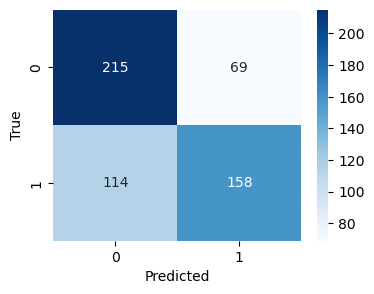

In [778]:
# plotting my confusion matrix
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [779]:
rf_estimator = ensemble.named_estimators_['rf']

# Get the feature importances
feature_importances = rf_estimator.feature_importances_

# Optionally, print the importance along with feature names
feature_names = list(X_train.columns) # assuming X_train is a DataFrame
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)


accident_year 0.0
location_easting_osgr 0.07855883888448972
location_northing_osgr 0.07524572285383478
longitude 0.07805642452310846
latitude 0.07354953953286338
police_force 0.05023722208464088
number_of_vehicles 0.04514449173634482
number_of_casualties 0.025529317937050183
day_of_week 0.043799167687132
local_authority_district 0.07330968643919458
first_road_class 0.023328180631591387
first_road_number 0.05860126272624591
road_type 0.0172929186205804
speed_limit 0.0714337375893043
junction_detail 0.028099925032094703
junction_control 0.01971003072824338
second_road_class 0.025513360716921844
second_road_number 0.012225726654437708
pedestrian_crossing_human_control 0.0013586992672371101
pedestrian_crossing_physical_facilities 0.015283359022526205
light_conditions 0.02687348629298806
weather_conditions 0.019330747705263957
road_surface_conditions 0.01579087945079792
special_conditions_at_site 0.00520916067108833
carriageway_hazards 0.003871545826273258
urban_or_rural_area 0.031250047800

In [780]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Print or use the DataFrame as needed


In [781]:
# printing my feature importance in an ascending value
feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
1,location_easting_osgr,0.078559
3,longitude,0.078056
27,hours,0.078054
2,location_northing_osgr,0.075246
4,latitude,0.073550
9,local_authority_district,0.073310
13,speed_limit,0.071434
11,first_road_number,0.058601
5,police_force,0.050237
6,number_of_vehicles,0.045144
